# Machine Learning Project - June 2021

### Group 3
#### Itamar Mishani 311337604
#### Noam Nahum 203850979

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None  # default='warn'
import time

# Scikit-learn plots:
from sklearn.model_selection import train_test_split, learning_curve, KFold, ShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFECV

# pandas configuration
pd.set_option('display.max_columns', 999)

In [2]:
starting = time.time()

In [3]:
df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/test_without_target.csv')

In [4]:
df.head()

0        1    2         3       4         5  6      7  8           9  \
0  1.0        a  -1d  0.828866   216.0  4.846091  K   50.0  0  161.714226   
1  8.0        a  -1d  8.981168    46.0  7.324911  A  270.0  0  328.559851   
2  1.0        a  -1d  1.458061  3304.0  7.548887  D  200.0  1  298.775554   
3  1.0        b  -1d  2.753682   212.0  8.200746  E  170.0  0  285.342907   
4  1.0  unknown  -1d  4.496872  1050.0  5.071094  B  260.0  1  328.464688   

    10          11 12   13     14   15 16        17  18   19         20  label  
0  0.0   85.964376  n  2.0  414.0  0.0  S  2.191401  a8  NaN  15.921017      1  
1  0.0  294.552881  n  3.0   63.0  0.0  M  3.811778  a8  NaN  47.567140      0  
2  0.0  317.615920  n  1.0  218.0  0.0  M  4.284457  a4  NaN  10.522228      0  
3  0.0  181.773337  y  2.0    NaN  0.0  D  4.680751  a7  NaN  21.185050      0  
4  0.0  454.058222  n  3.0  293.0  0.0  S  2.740114  a5  NaN  47.491164      0

In [5]:
test_df.head()

Unnamed: 0    0        1     2         3       4         5  6      7  8  \
0           0  1.0        a   -1d  4.385878     5.0  7.231414  D   70.0  0   
1           1  1.0  unknown   -1d  1.235237  2486.0  4.979543  D  290.0  1   
2           2  1.0        a   90d  3.367264   205.0  7.118272  F   40.0  0   
3           3  1.0        a  112d -3.398645  2273.0  6.986870  D  180.0  1   
4           4  6.0        a   -1d  1.358163  2300.0  6.305195  B   80.0  0   

            9   10          11 12   13     14   15 16        17   18   19  \
0  194.547988  0.0  146.606083  n  1.0  118.0  0.0  D  4.284457   a7  NaN   
1  338.986573  0.0  461.061120  n  2.0  733.0  0.0  S  2.664354   a5  NaN   
2  138.969746  2.0  274.415273  n  2.0    NaN  0.0  M  3.948146   a5    B   
3  288.954053  2.0   76.330357  n  1.0    NaN  0.0  M  3.743150  a11    A   
4  208.324903  0.0   41.221638  n  2.0  160.0  0.0  S  3.674207   a8  NaN   

          20  
0  33.679747  
1  36.426381  
2   5.375061  
3  14.739503  
4  -2.064077

In [6]:
test_df.drop(['Unnamed: 0'],axis=1,inplace = True)  # drop the first column "Unnamed: 0"

# Part 1: Data Exploration


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21931 entries, 0 to 21930
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21858 non-null  float64
 1   1       21842 non-null  object 
 2   2       21875 non-null  object 
 3   3       21826 non-null  float64
 4   4       21906 non-null  float64
 5   5       21871 non-null  float64
 6   6       21786 non-null  object 
 7   7       21911 non-null  float64
 8   8       21931 non-null  int64  
 9   9       21892 non-null  float64
 10  10      21828 non-null  float64
 11  11      21860 non-null  float64
 12  12      21918 non-null  object 
 13  13      21891 non-null  float64
 14  14      17946 non-null  float64
 15  15      21832 non-null  float64
 16  16      21921 non-null  object 
 17  17      21830 non-null  float64
 18  18      21847 non-null  object 
 19  19      4250 non-null   object 
 20  20      21930 non-null  float64
 21  label   21931 non-null  int64  
dty

#### Not float columns check:

In [8]:
df[df.columns[df.dtypes != 'float64']].head(10)

1     2  6  8 12 16   18   19  label
0        a   -1d  K  0  n  S   a8  NaN      1
1        a   -1d  A  0  n  M   a8  NaN      0
2        a   -1d  D  1  n  M   a4  NaN      0
3        b   -1d  E  0  y  D   a7  NaN      0
4  unknown   -1d  B  1  n  S   a5  NaN      0
5  unknown   -1d  A  0  n  S   a5  NaN      0
6        a  349d  D  1  n  S   a5    A      0
7        a   -1d  A  1  n  M  a11  NaN      0
8  unknown   -1d  D  0  n  M   a6  NaN      0
9        a   -1d  F  0  n  D   a3  NaN      1

## Showing each feature stats

In [9]:
stats = df.describe().T.reset_index()
stats

index    count         mean          std          min         25%  \
0       0  21858.0     2.709443     2.976380     1.000000    1.000000   
1       3  21826.0     4.204116     3.752786   -11.138786    1.605409   
2       4  21906.0  1383.256596  3030.087625 -8019.000000   80.000000   
3       5  21871.0     6.589936     0.921664     3.776680    5.901285   
4       7  21911.0   157.450596    83.121658    10.000000   80.000000   
5       8  21931.0     0.542429     0.498208     0.000000    0.000000   
6       9  21892.0   256.617674    71.635412    -1.892158  209.751981   
7      10  21828.0     0.608164     1.893069     0.000000    0.000000   
8      11  21860.0   268.845882   183.952200     0.003898  119.317515   
9      13  21891.0     2.063816     0.784205     0.000000    2.000000   
10     14  17946.0   276.022010   274.575423     0.000000  108.000000   
11     15  21832.0     0.017314     0.130442     0.000000    0.000000   
12     17  21830.0     3.647972     0.746277     1.939095    3.036520   
13     20  21930.0    26.278887    20.111219   -54.438941   12.679984   
14  label  21931.0     0.178423     0.382877     0.000000    0.000000   

           50%          75%            max  
0     2.000000     3.000000      51.000000  
1     4.190917     6.811247      17.647593  
2   470.000000  1472.750000  102127.000000  
3     6.517118     7.246177      10.303540  
4   160.000000   210.000000     310.000000  
5     1.000000     1.000000       1.000000  
6   277.786998   306.584649     347.191571  
7     0.000000     0.000000      41.000000  
8   242.093814   388.855035    1081.031042  
9     2.000000     3.000000       3.000000  
10  191.000000   342.000000    4918.000000  
11    0.000000     0.000000       1.000000  
12    3.535312     4.150667       7.141043  
13   26.477637    39.945262     102.590418  
14    0.000000     0.000000       1.000000

#### Notice that most of the values in column 19 are NaN values, Thus we will remove this column:

In [10]:
df.drop(columns=['19'], inplace=True)
test_df.drop(columns=['19'], inplace=True)

#### We would like to check whether there are rows with a lot of missing values that we can ommit. 

In [11]:
(df.apply(lambda x: x.isnull().sum(), axis=1) > 3).sum()

0

#### As we can see there are no samples in which there are more than 3 columns with NaN value

## Arrange the data:
### Numeric features

In [12]:
## numeric columns
df_numeric_col = df[df.columns[df.dtypes == 'float64']]
df_numeric_col

0         3       4         5      7           9   10          11  \
0      1.0  0.828866   216.0  4.846091   50.0  161.714226  0.0   85.964376   
1      8.0  8.981168    46.0  7.324911  270.0  328.559851  0.0  294.552881   
2      1.0  1.458061  3304.0  7.548887  200.0  298.775554  0.0  317.615920   
3      1.0  2.753682   212.0  8.200746  170.0  285.342907  0.0  181.773337   
4      1.0  4.496872  1050.0  5.071094  260.0  328.464688  0.0  454.058222   
...    ...       ...     ...       ...    ...         ...  ...         ...   
21926  1.0  9.234068   228.0  6.497949  200.0  298.387445  0.0  199.845633   
21927  3.0  1.425130   829.0  4.459834  270.0  330.998210  2.0  654.216171   
21928  1.0  7.656161   296.0  6.688392   80.0  210.458322  0.0   97.943586   
21929  2.0  4.016924    57.0  5.486059   90.0  220.485053  0.0  407.562382   
21930  1.0  1.026590    54.0  6.392427  100.0  231.026259  0.0  399.276127   

        13     14   15        17         20  
0      2.0  414.0  0.0  2.191401  15.921017  
1      3.0   63.0  0.0  3.811778  47.567140  
2      1.0  218.0  0.0  4.284457  10.522228  
3      2.0    NaN  0.0  4.680751  21.185050  
4      3.0  293.0  0.0  2.740114  47.491164  
...    ...    ...  ...       ...        ...  
21926  2.0  257.0  0.0  3.036520  23.647446  
21927  0.0  196.0  0.0  2.108740  17.079316  
21928  3.0    NaN  0.0  4.083415  26.412485  
21929  2.0  404.0  0.0  2.587831  -2.056748  
21930  2.0    NaN  0.0  3.535312  44.396488  

[21931 rows x 13 columns]

### Correlation plot between the numberic features

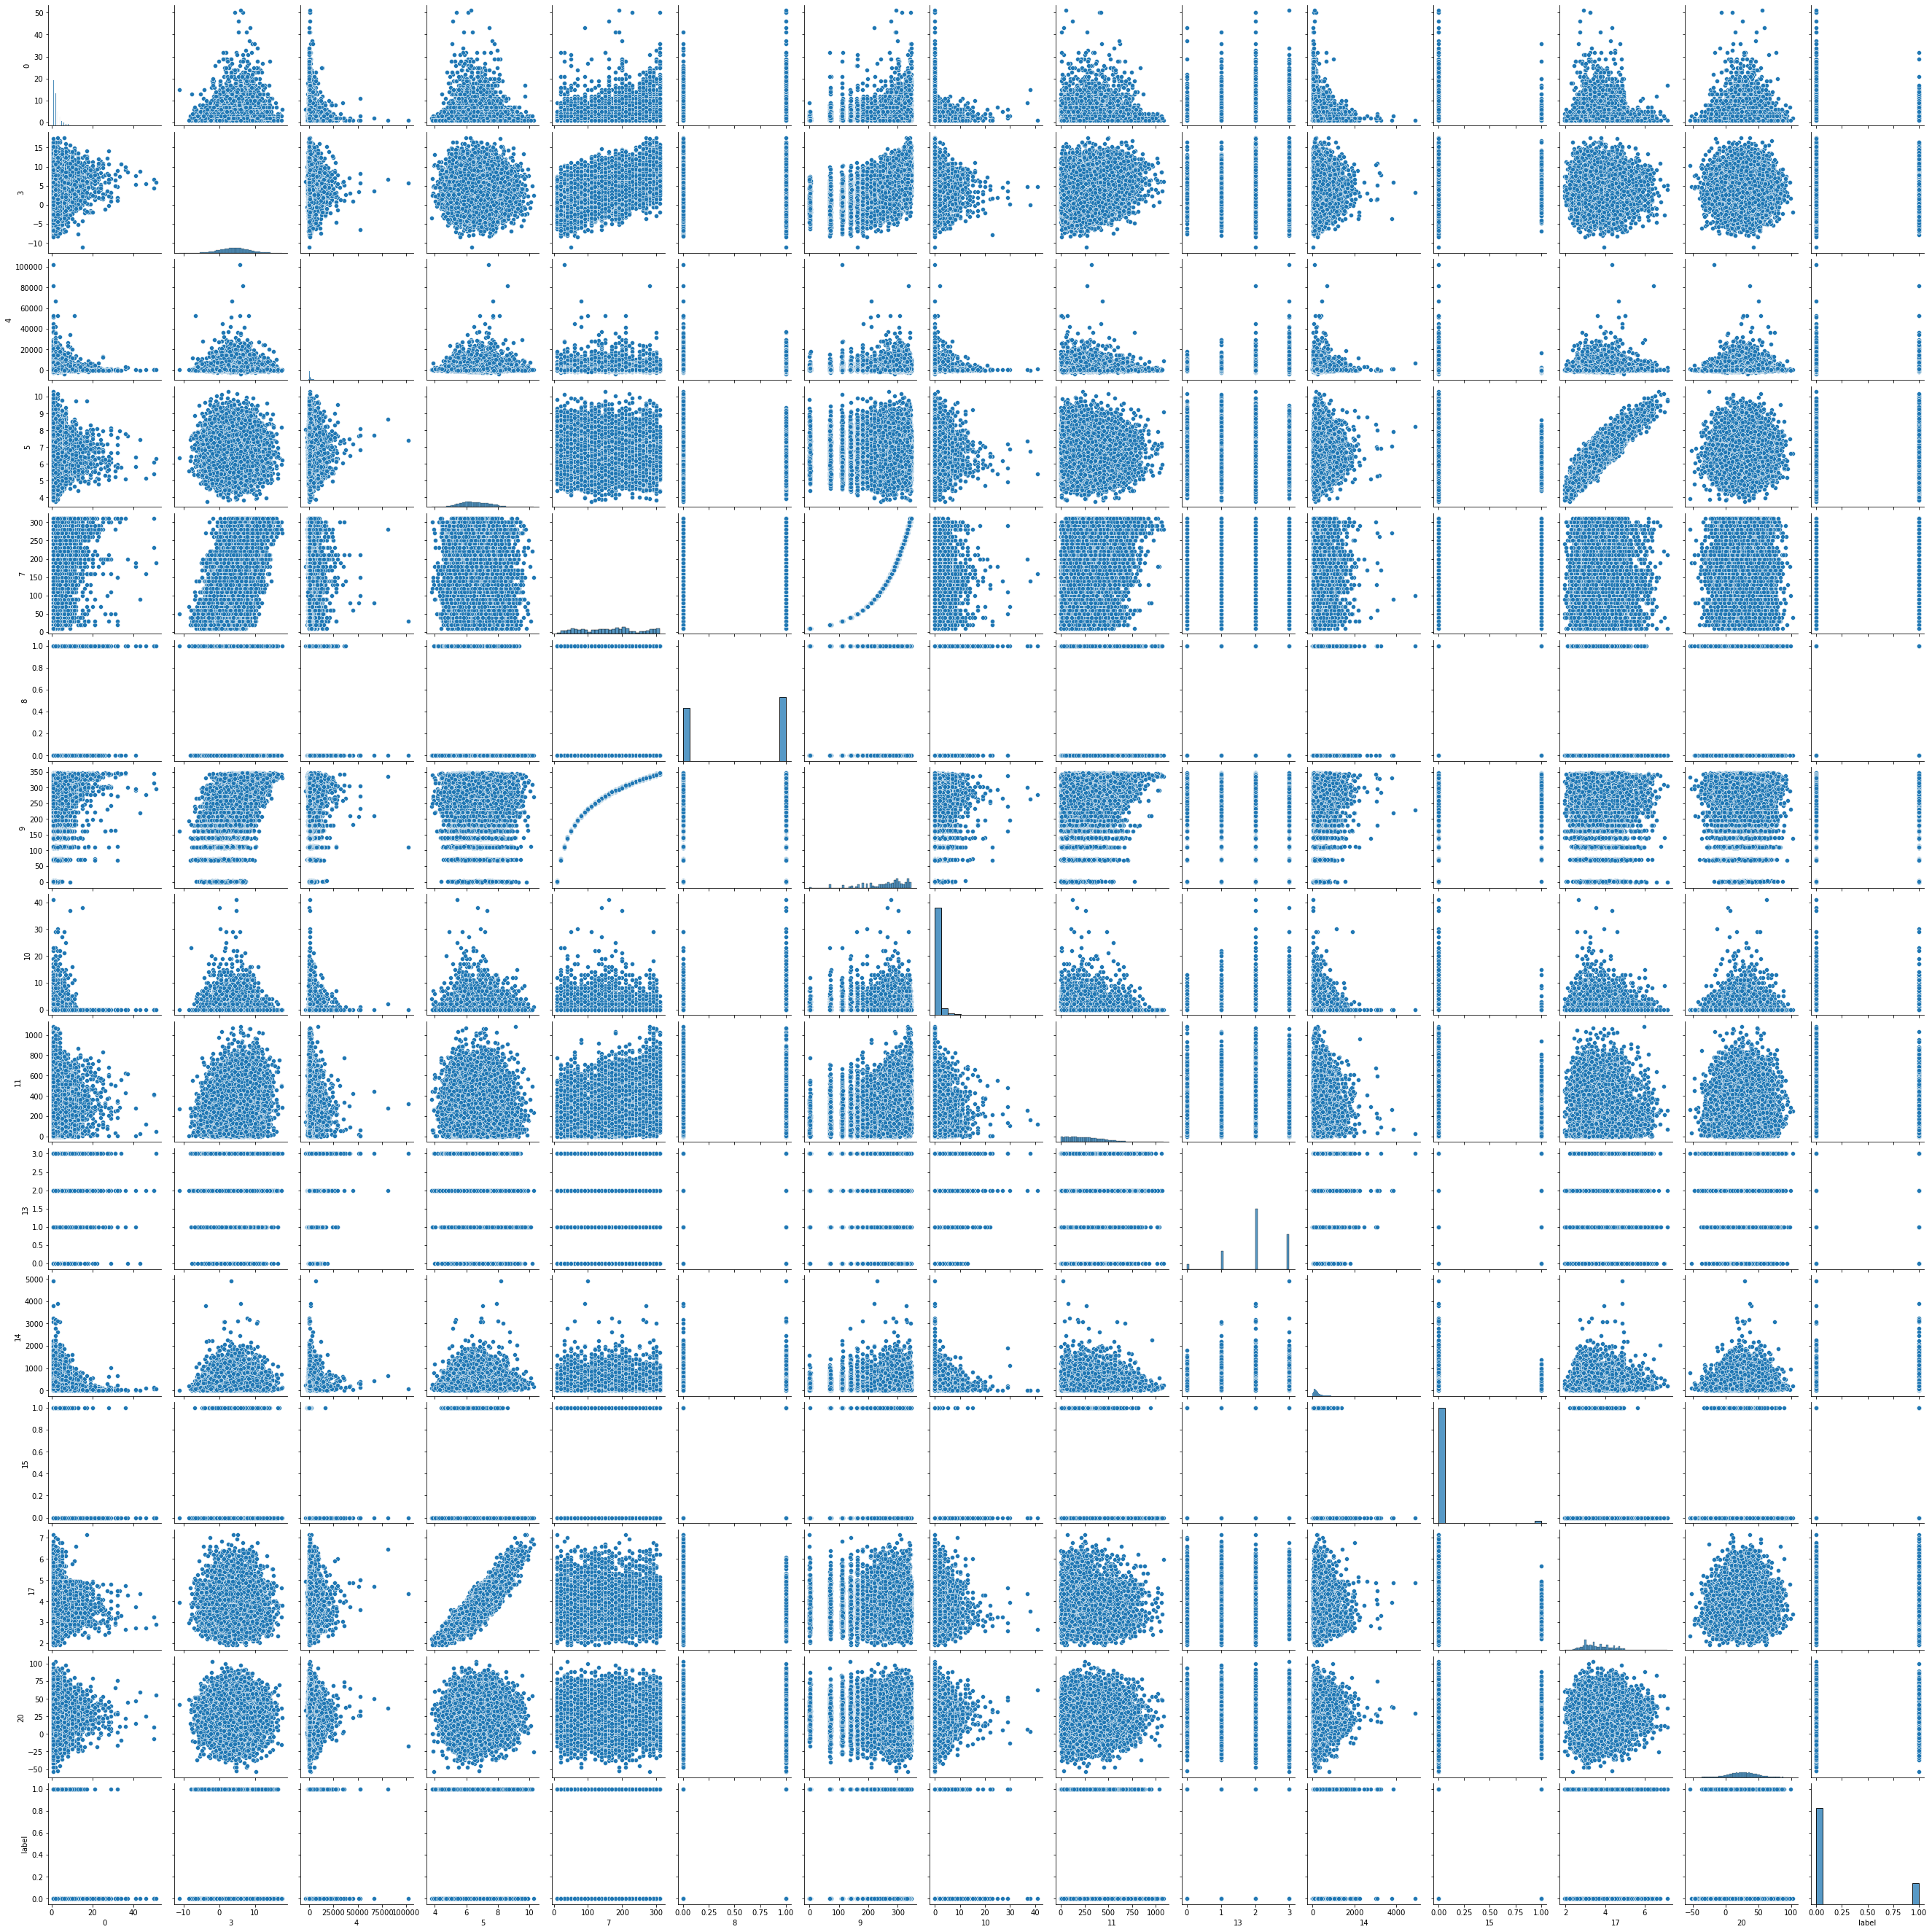

In [13]:
sns.pairplot(df.dropna())

## Feature Corrlation heatmap

In [14]:
corr = df.corr().iloc[:-1, :-1]

<AxesSubplot:>

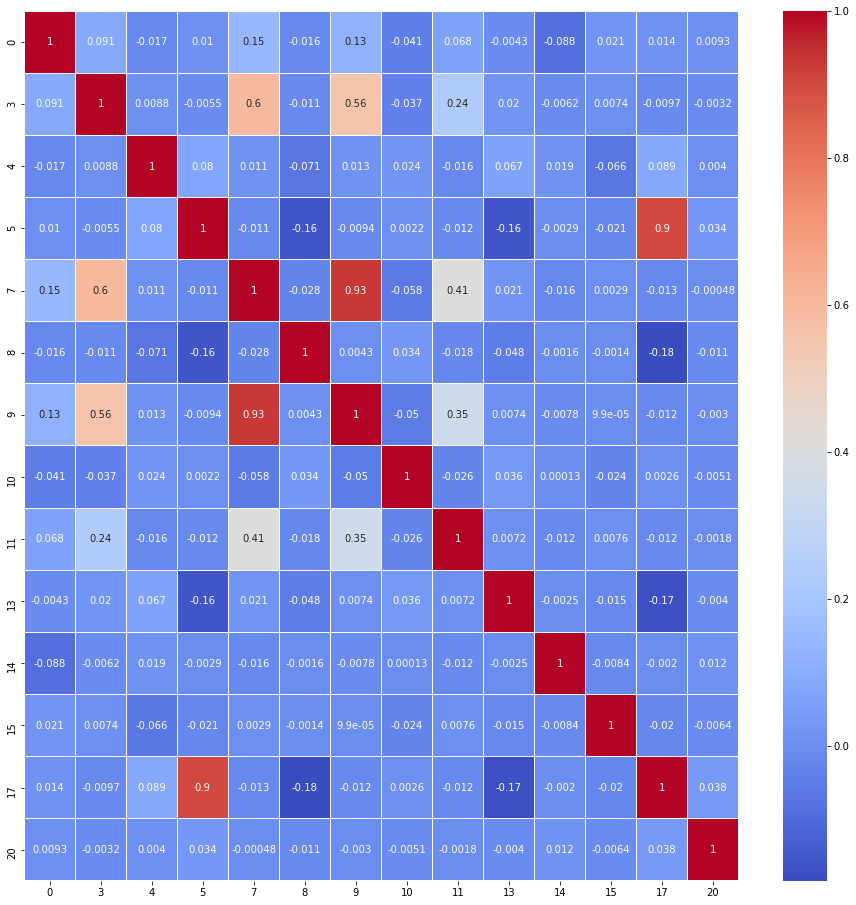

In [15]:
plt.subplots(figsize=(16,16))
sns.heatmap(corr,
           annot=True, linewidth='0.05', cmap="coolwarm")

### Find each feature maximum corrlation
#### We will use this information to decide if we can emmit some of our corrlated data or make a super position of the most corrlated featuers

In [16]:
corr_max = corr.apply(lambda x: [x.iloc[lambda y: y.index != x.name].max(), x.iloc[lambda y: y.index != x.name].idxmax()])

In [17]:
corr_max

0         3         4         5         7         8         9  \
0  0.148854  0.595225  0.089116  0.900337  0.934719  0.033749  0.934719   
1         7         7        17        17         9        10         7   

         10        11        13        14       15        17        20  
0  0.035655  0.408754  0.066848  0.019207  0.02106  0.900337  0.038005  
1        13         7         4         4        0         5        17

### we can see that feature 17 and 7 has the most corrleation with other features.
## Plotting numeric columns histograms

In [18]:
a = sns.color_palette("Paired")
a.append(sns.color_palette("Paired")[0])

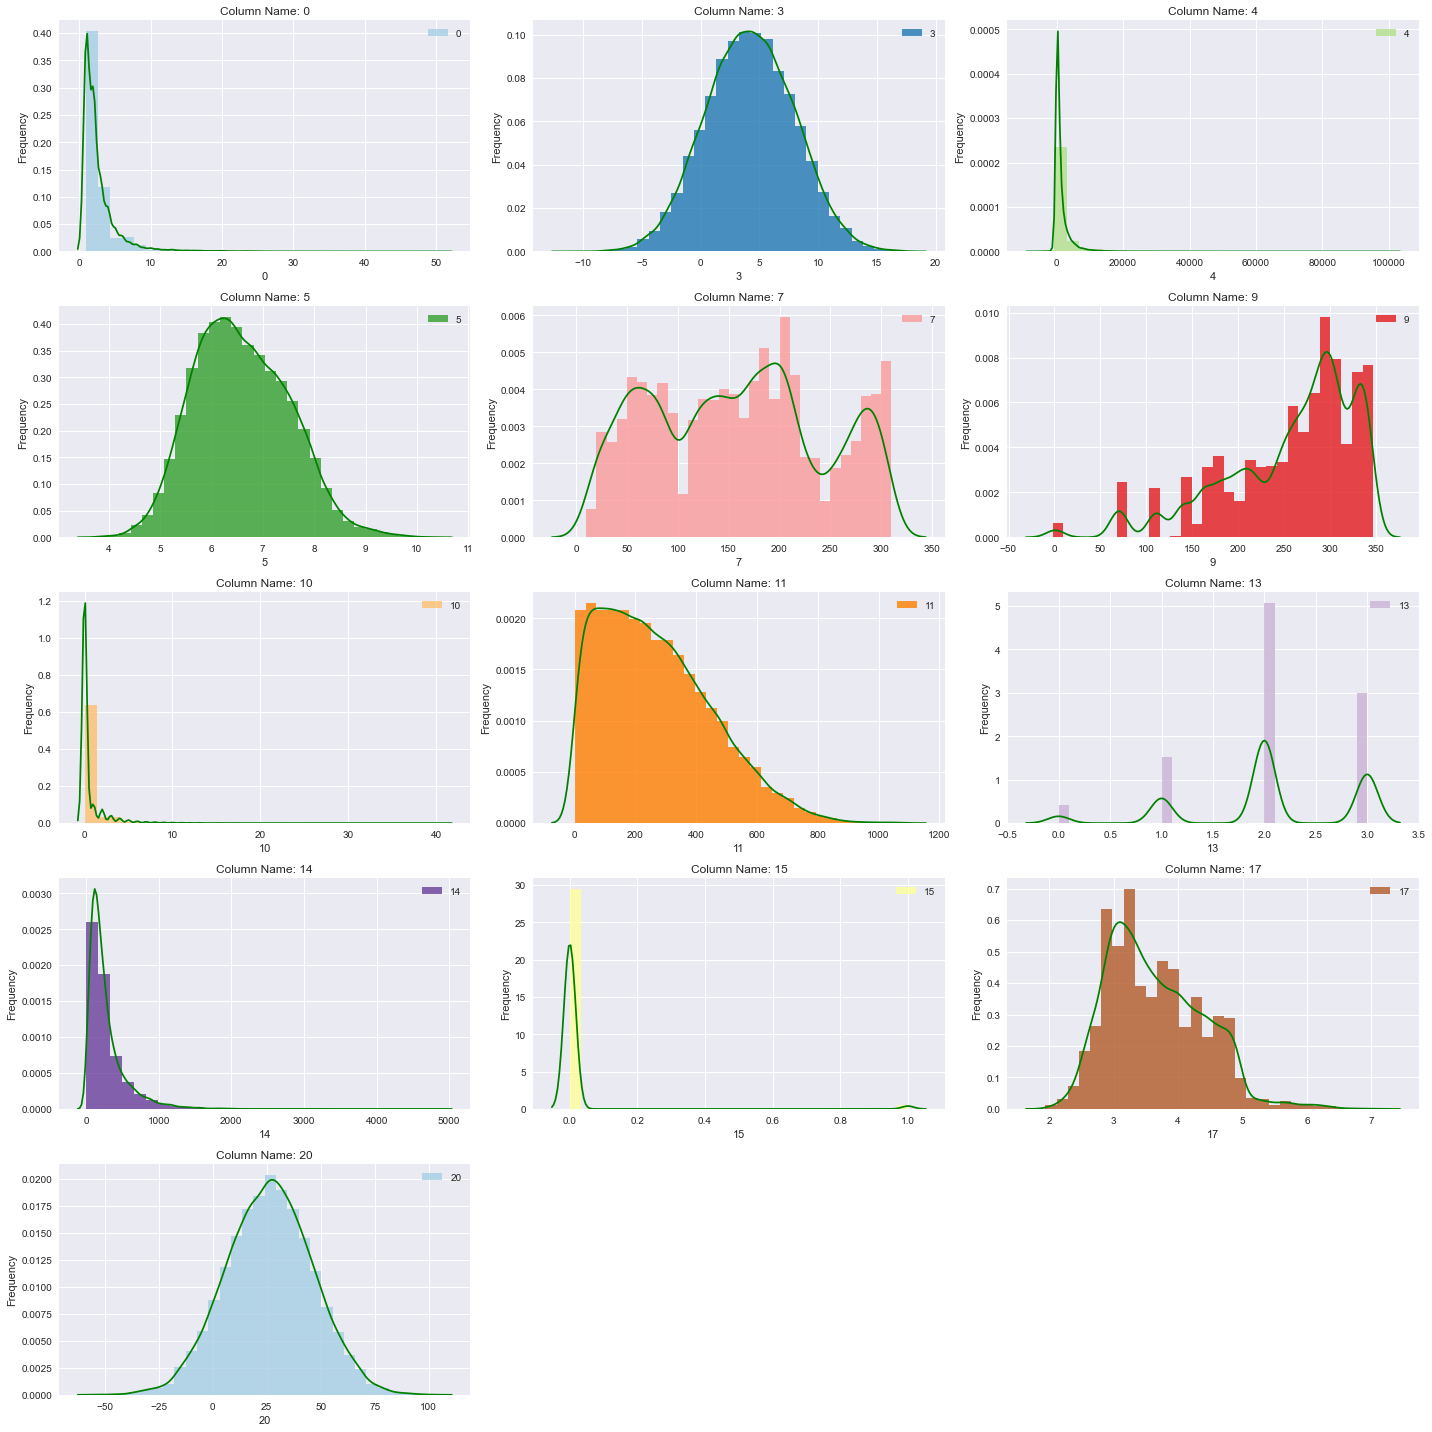

In [19]:
plt.style.use('seaborn')
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns)), a):
    plt.subplot(5, 3, ind+1)
    df_numeric_col[col].plot.hist(bins=30 , density=1, alpha=0.8, color=color,title='Column Name: '+ col, figsize=(20,20), legend=True)
    x = np.linspace(stats[stats['index'] == col]['mean'] - 3*stats[stats['index'] == col]['std'],
                    stats[stats['index'] == col]['mean'] + 3*stats[stats['index'] == col]['std'], 100)
#     plt.plot(x, st.norm.pdf(x, stats[stats['index'] == col]['mean'], stats[stats['index'] == col]['std']), c='r', alpha=0.5)
    sns.kdeplot(df[col], c='g')
plt.tight_layout()

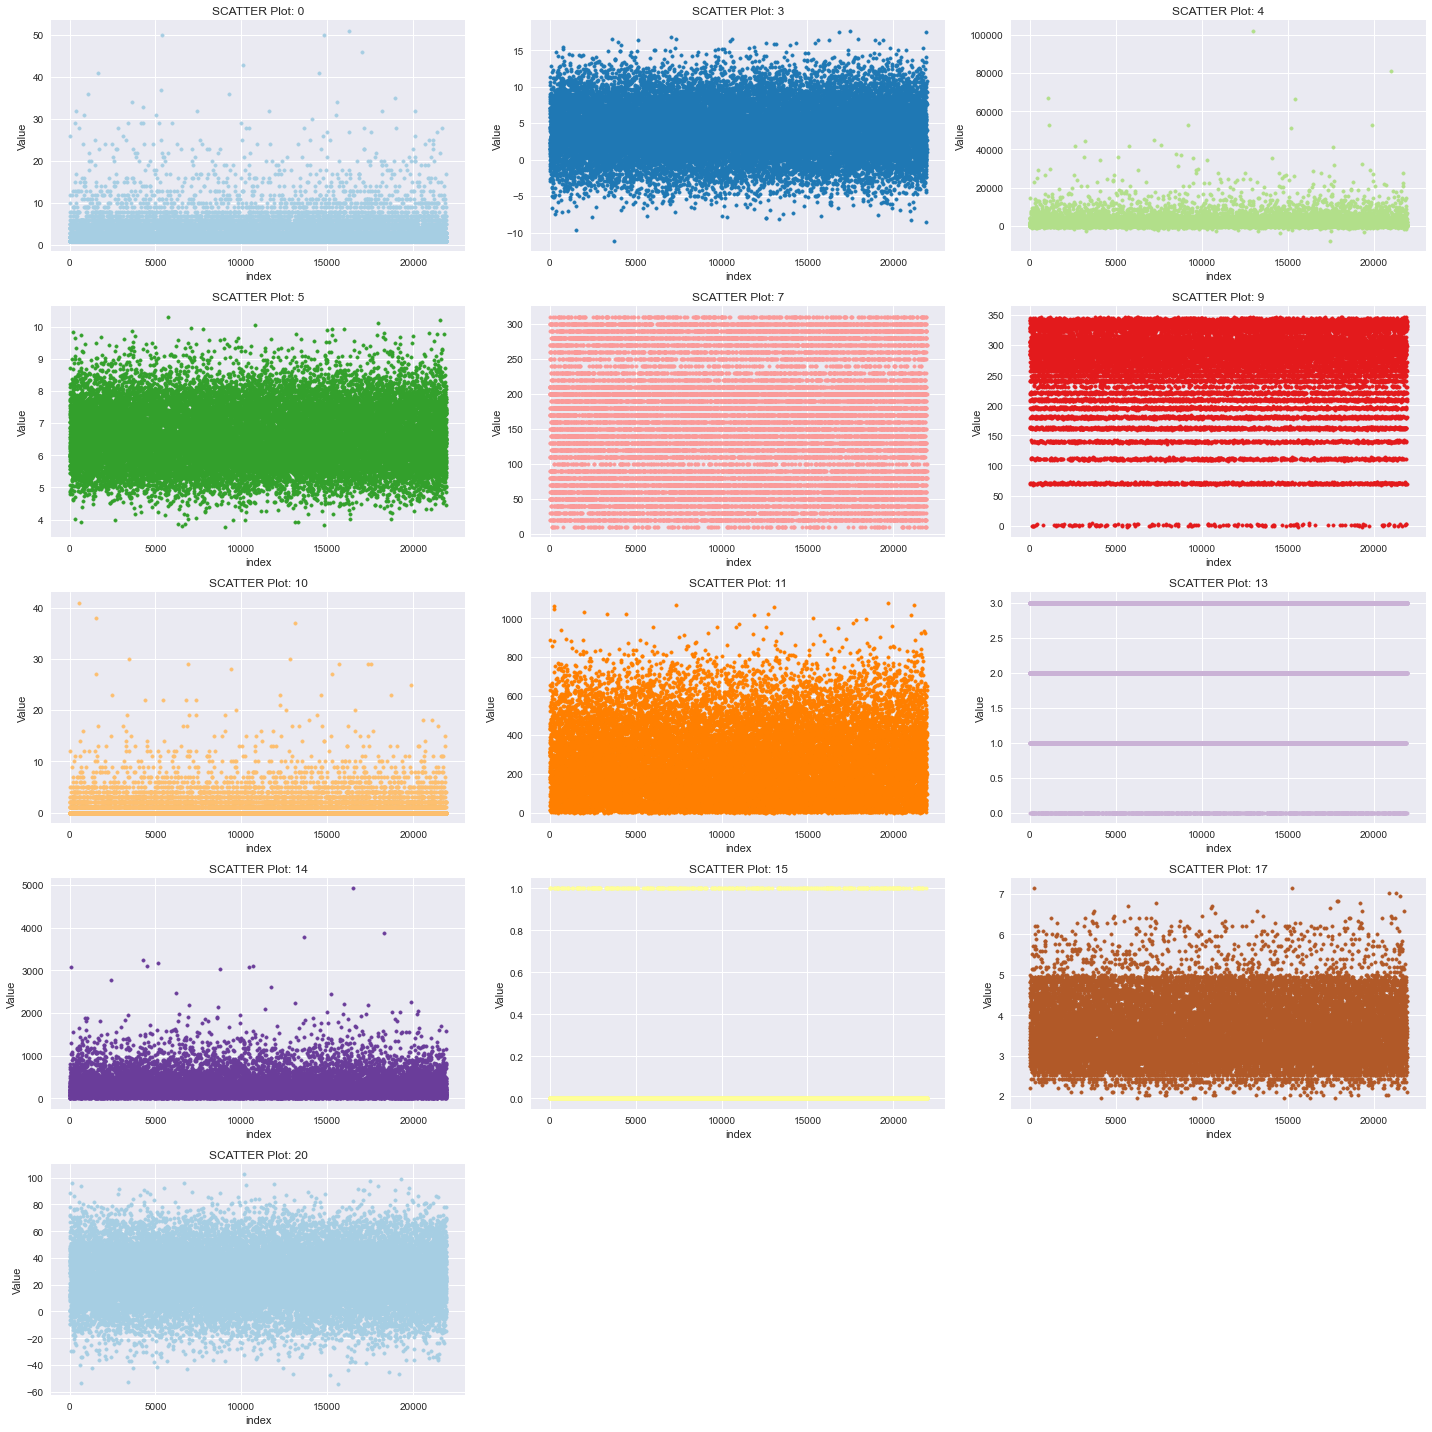

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns)),a):
    plt.subplot(5, 3, ind+1)
    x = df_numeric_col[col].reset_index()
    plt.scatter(x['index'], x[col], marker = ".",color = color)
    plt.gca().update(dict(title='SCATTER Plot: ' +str(col) , xlabel='index', ylabel='Value'))
plt.tight_layout()

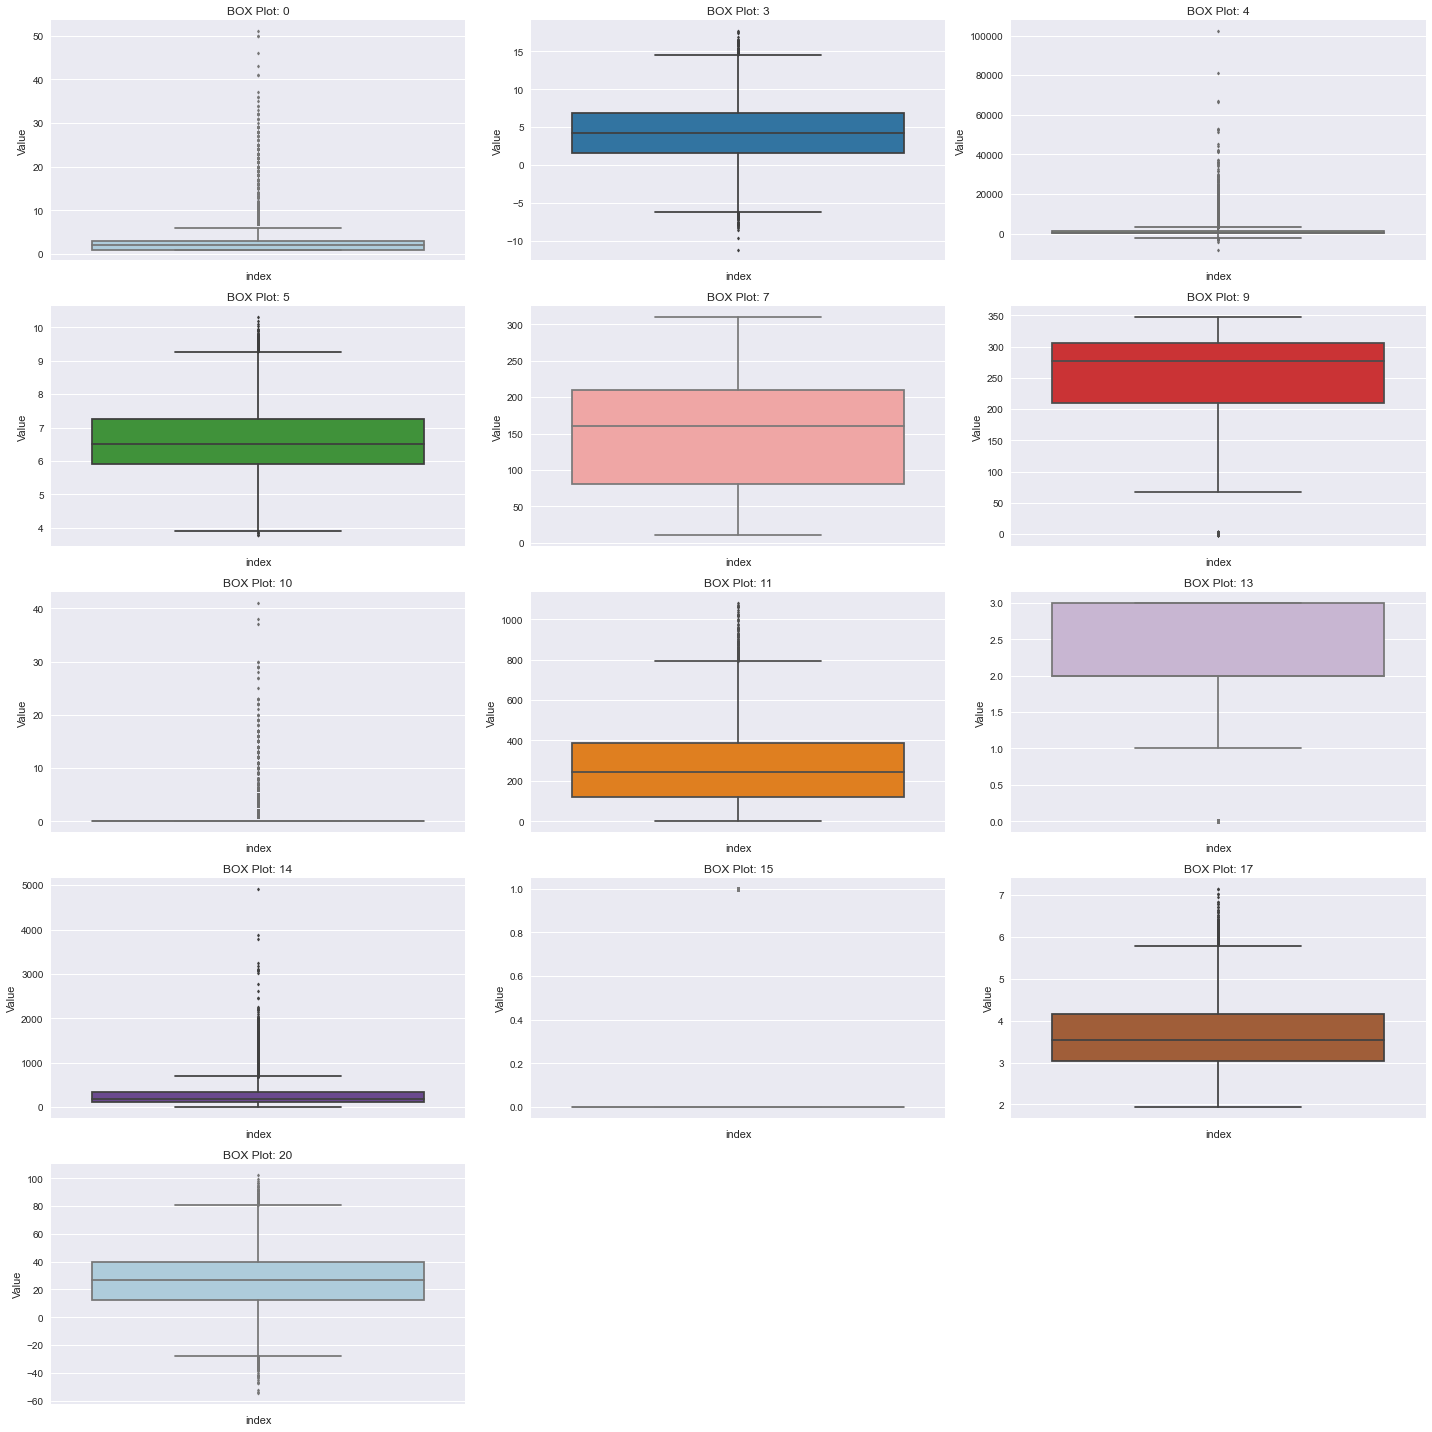

In [21]:
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns)),a):
    plt.subplot(5, 3, ind+1)
    sns.boxplot(y=df[col], color=color, fliersize=2)
    plt.gca().update(dict(title='BOX Plot: ' +str(col) , xlabel='index', ylabel='Value'))
plt.tight_layout()

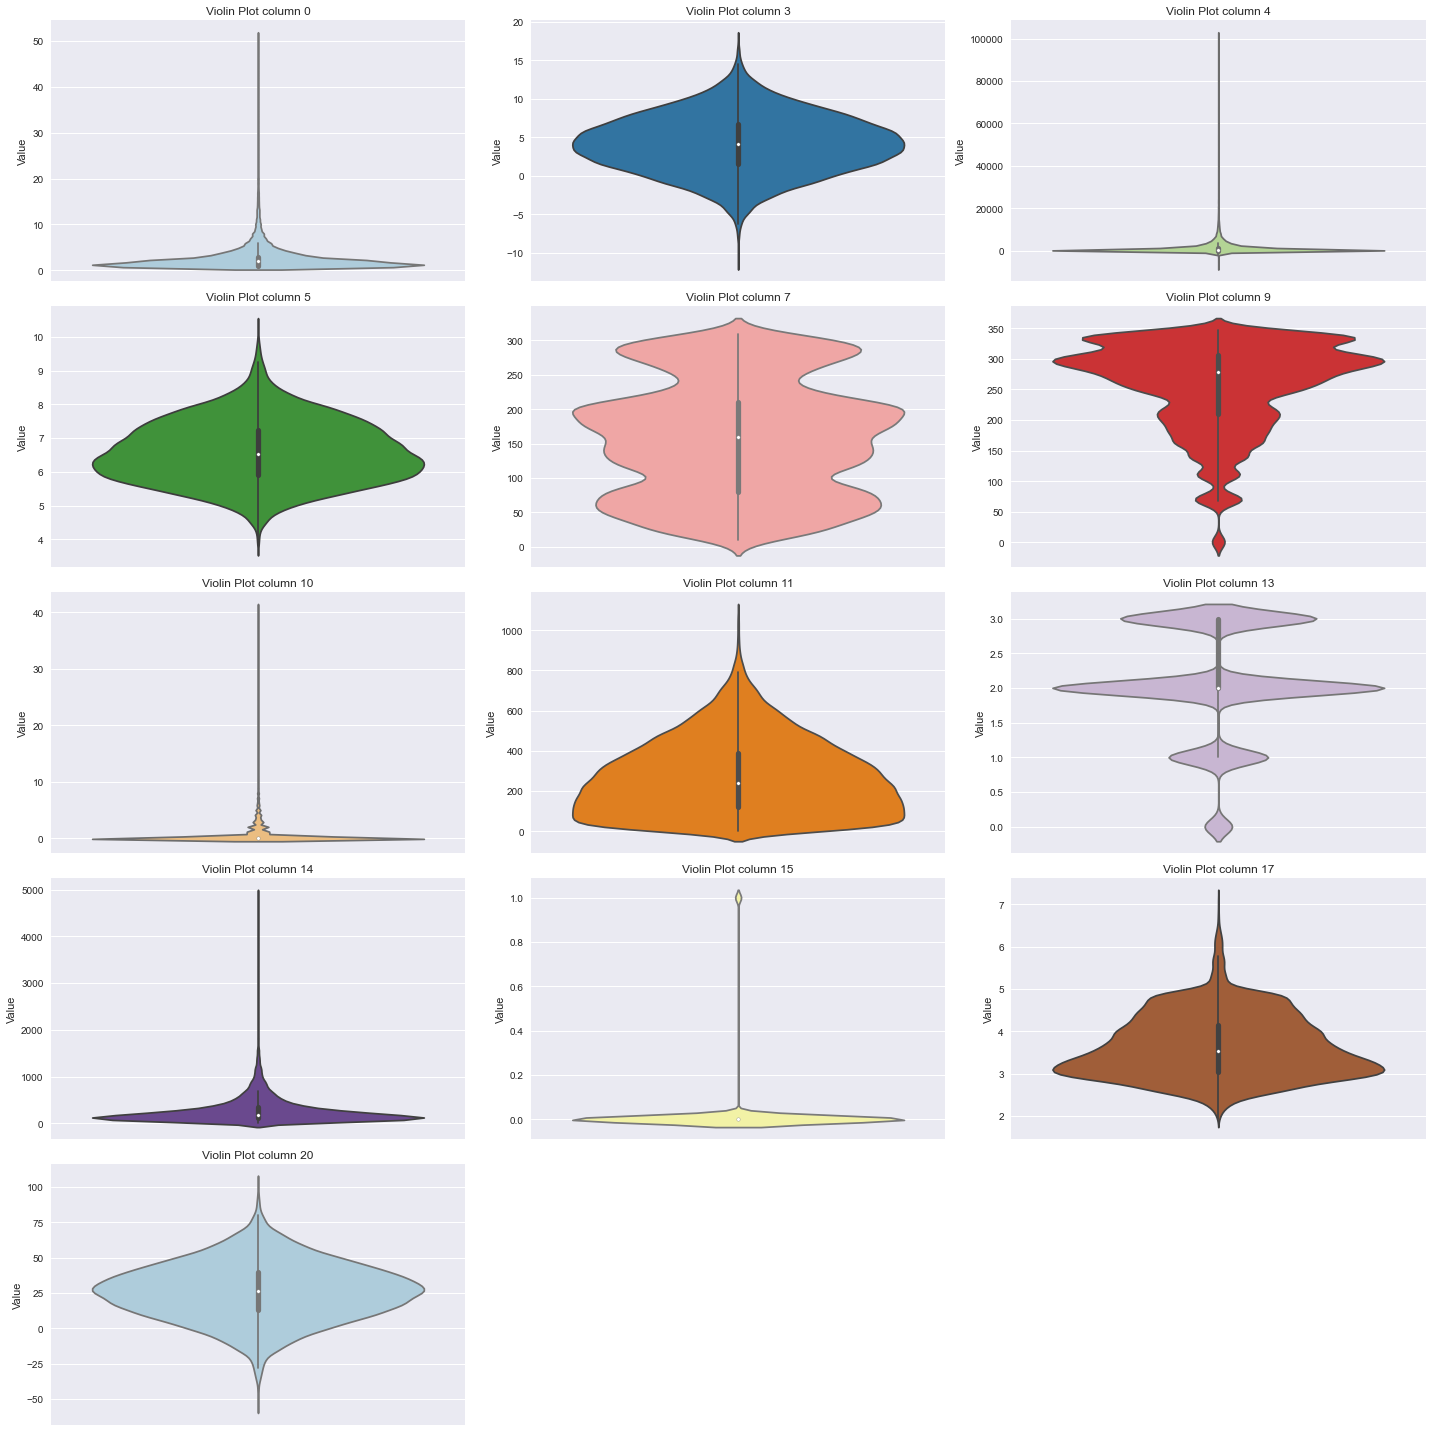

In [22]:
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns)),a):
    plt.subplot(5, 3, ind+1)
    sns.violinplot(y=df[col], color=color, inner='box')
    plt.gca().update(dict(title='Violin Plot column ' +str(col) ,ylabel='Value'))
plt.tight_layout()

### Counting NaN values in the dataframe

In [23]:
df.apply(lambda col: col.isnull().sum())

0          73
1          89
2          56
3         105
4          25
5          60
6         145
7          20
8           0
9          39
10        103
11         71
12         13
13         40
14       3985
15         99
16         10
17        101
18         84
20          1
label       0
dtype: int64

### Checking the number of unique elements in each numeric feature

In [24]:
print('Number of unique elements in each numeric column in the train data set:')
df[df.columns[df.dtypes == 'float64']].nunique() #.reset_index().drop(columns='index').T

Number of unique elements in each numeric column in the train data set:


0        42
3     21826
4      5365
5     21871
7        31
9     21892
10       32
11    21860
13        4
14     1332
15        2
17       76
20    21930
dtype: int64

In [25]:
print('Number of unique elements in each numeric column in the test data set:')
test_df[test_df.columns[test_df.dtypes == 'float64']].nunique()

Number of unique elements in each numeric column in the test data set:


0       37
3     7287
4     3161
5     7288
7       31
9     7291
10      34
11    7276
13       4
14    1030
15       2
17      73
20    7311
dtype: int64

# Part 2: Preprocessing:

### First we will perform some changes to high corrleated features
#### we will drop one from the two features whos corr is higher then 0.9
##### so from the visualize heat map and the most correlated features table we can see that we can drop feature 17 and 7.

In [26]:
# df['14'] = np.dot(-1, np.log(df['14']+0.1))

In [27]:
# df['14'].plot.hist(bins=30 , density=1, alpha=0.8, color=color,title='Column Name: 14', figsize=(20,20), legend=True)

In [28]:
## Lets check some combination 

# df.drop(columns=['7','17'], inplace=True)
# test_df.drop(columns=['7','17'], inplace=True)

### We will start examine the outliers in each feature.
#### We can do it using two major methods. First, by using Data deviation and second, by using Interquartile Range.

#### This function the filtered df without the outliers using interquartile range

In [29]:
def quart(num):
    if type(num) == int:
        num = str(num)
    HQ = df[num].quantile(0.75)
    LQ = df[num].quantile(0.25)
    high = (HQ - LQ)*1.5 + HQ
    low = -(HQ- LQ)*1.5 + LQ
    df_filtered = df[num][(df[num] < high) & (df[num] > low)]
# #     df = df[(df[num] < high) & (df[num] > low)]
#     sns.kdeplot(df_filtered)
    print('Number of outliers in feature {} is {}'.format(num, df[num].dropna().shape[0] - df_filtered.shape[0]))
    return df_filtered #df_numeric_col[num][(df_numeric_col[num] > high) | (df_numeric_col[num] < low)]


#### This function the filtered df without the outliers using data deviation

In [30]:
def dat_dev(num): ## This function return the outliers points
    x_index = df[num].dropna()[(np.abs(st.zscore(df[num].dropna())) <= 3)].reset_index()
    print('Number of outliers in feature {} is {}'.format(num, df[num].dropna().shape[0] - x_index.shape[0]))
    return df.loc[x_index['index'], num]
#df[df['A'].isin([3, 6])]

## Column '0':

In [31]:
print('Values frequency: ')
freq_series = df['0'].value_counts(dropna = False)
freq_0 = (freq_series/freq_series.sum())*100
freq_0

Values frequency: 


1.0     39.145502
2.0     27.782591
3.0     12.097032
4.0      7.532716
5.0      3.948748
6.0      2.685696
7.0      1.586795
8.0      1.226574
9.0      0.647485
10.0     0.574529
11.0     0.410378
NaN      0.332862
13.0     0.319183
12.0     0.287265
14.0     0.196069
15.0     0.173271
16.0     0.155032
17.0     0.141352
20.0     0.104874
19.0     0.095755
18.0     0.086635
23.0     0.063837
21.0     0.059277
24.0     0.054717
25.0     0.041038
22.0     0.041038
28.0     0.036478
29.0     0.031918
32.0     0.022799
27.0     0.018239
26.0     0.018239
31.0     0.013679
36.0     0.009120
50.0     0.009120
34.0     0.009120
41.0     0.009120
43.0     0.004560
35.0     0.004560
37.0     0.004560
33.0     0.004560
46.0     0.004560
30.0     0.004560
51.0     0.004560
Name: 0, dtype: float64

#### Since feature '0' distributes as $e^{-x}$ we will manipulate this feature using Log:

In [32]:
# df['0'] = np.log(df['0'])
# test_df['0'] = np.log(df['0'])

#### Using Interquanrtile Range:

In [33]:
df['0'] = quart('0') 

Number of outliers in feature 0 is 2009


#### Although by looking at the outliers of feature number '0', it may seems to have a big range of outliers and by ignoring this data we can achive 5 unique elements in the feature, but since in the plots it seems like exponent distribution, we rather keep all the data. 

## Column '3':

#### As can be seen in the plots, these feature looks like normal distribution

In [34]:
df['3'] = dat_dev('3')

Number of outliers in feature 3 is 44


## Column '4':

#### By looking on feature '4' we can see that most frequented value is 0.0

In [35]:
print('Values frequency: ')
freq_series = df['4'].value_counts(dropna = False)
freq_4 = (freq_series/freq_series.sum())*100
freq_4

Values frequency: 


0.0        7.546396
1.0        0.405818
2.0        0.383019
4.0        0.287265
3.0        0.250787
             ...   
3102.0     0.004560
6710.0     0.004560
6360.0     0.004560
2165.0     0.004560
29887.0    0.004560
Name: 4, Length: 5366, dtype: float64

In [36]:
df['4'] = np.log(df['4']+10000)

In [37]:
dat_dev('4')

Number of outliers in feature 4 is 490


0        9.231710
1        9.214930
2        9.495820
3        9.231319
4        9.310186
           ...   
21926    9.232884
21927    9.289983
21928    9.239511
21929    9.216024
21930    9.215726
Name: 4, Length: 21416, dtype: float64

### Column '5':
#### As can be seen in the plots, these feature looks like normal distribution

In [38]:
df['5'] = dat_dev('5')

Number of outliers in feature 5 is 64


### Column '7':

In [39]:
dat_dev('7')

Number of outliers in feature 7 is 0


0         50.0
1        270.0
2        200.0
3        170.0
4        260.0
         ...  
21926    200.0
21927    270.0
21928     80.0
21929     90.0
21930    100.0
Name: 7, Length: 21911, dtype: float64

### Column '9':

In [40]:
df['9'] = dat_dev('9')

Number of outliers in feature 9 is 167


#### Since the outliers are grouped we wont use outliers removal on  feature 9

### Column '10':

In [41]:
freq_series = df['10'].value_counts(dropna = False)
freq_10 = (freq_series/freq_series.sum())*100
freq_10

0.0     80.228900
1.0      6.547809
2.0      4.760385
3.0      2.658338
4.0      1.691669
5.0      1.076102
6.0      0.661165
NaN      0.469655
7.0      0.465095
8.0      0.364780
9.0      0.246227
10.0     0.196069
11.0     0.127673
13.0     0.095755
12.0     0.095755
15.0     0.050157
14.0     0.041038
17.0     0.041038
16.0     0.031918
19.0     0.022799
22.0     0.018239
23.0     0.018239
29.0     0.018239
18.0     0.013679
20.0     0.013679
27.0     0.009120
30.0     0.009120
28.0     0.004560
41.0     0.004560
38.0     0.004560
21.0     0.004560
25.0     0.004560
37.0     0.004560
Name: 10, dtype: float64

#### Since 80% of samples are 0, we'll make this feature binary. All samples whos values are above 0 will be converted to 1, when NaN values will be converted to 1 as well. 

In [42]:
df['10'] = df['10'].apply(lambda x: 0 if x==0 else 1)

### Column '11':
### This feature distribute like either right tail gaussian or exponent

In [43]:
df['11'] = dat_dev('11')


Number of outliers in feature 11 is 95


### Column '14':

In [44]:
freq_series = df['14'].value_counts(dropna = False)
freq_14 = (freq_series/freq_series.sum())*100
freq_14

NaN       18.170626
112.0      0.341982
124.0      0.332862
108.0      0.323743
92.0       0.319183
            ...    
1528.0     0.004560
1569.0     0.004560
909.0      0.004560
1669.0     0.004560
2150.0     0.004560
Name: 14, Length: 1333, dtype: float64

After Log operation this feature looks like gaussian:

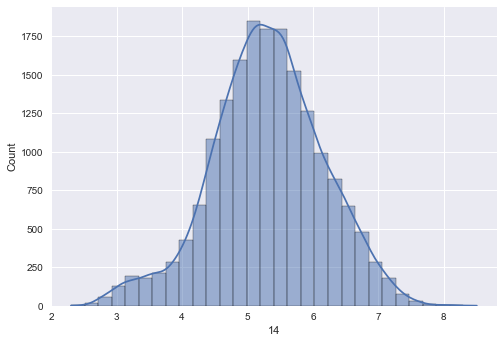

In [45]:
sns.histplot(np.log(df['14']+10), bins=30, kde=True);

In [46]:
df['14'] = np.log(df['14']+10)

In [47]:
dat_dev('14')

Number of outliers in feature 14 is 36


0        6.049733
1        4.290459
2        5.429346
4        5.713733
5        5.986452
           ...   
21923    5.442418
21924    5.424950
21926    5.587249
21927    5.327876
21929    6.025866
Name: 14, Length: 17910, dtype: float64

### We'll wait with handling these outliers

### Column '17': להעיף נקודות חריגות

In [48]:
df['17'] = dat_dev('17')

Number of outliers in feature 17 is 167


### Column 20

In [49]:
df['20'] = dat_dev('20')

Number of outliers in feature 20 is 70


### Handling NaN values of numeric features

In [50]:
def nan_handling(str_num, method):
    if method == 'gauss':
        mu, sigma = df[str_num].mean(), df[str_num].std() 
        s = np.random.normal(mu, sigma, df[str_num].isnull().sum())
        s2 = np.random.normal(mu, sigma, test_df[str_num].isnull().sum())
#         df_numeric_col.loc[:, (str_num)][df_numeric_col[str_num].isnull()] = s
        df.loc[:, (str_num)][df[str_num].isnull()] = s
        test_df.loc[:, (str_num)][test_df[str_num].isnull()] = s2
        print('Mean value is: {}, Standard deviation value is: {}'.format(round(mu,2), round(sigma,2)))
        return
    elif method == 'mean':
        val = df[str_num].mean()    
        print('Mean value is: {}'.format(round(val,2)))

    elif method == 'median':
        val = df[str_num].median()
        print('Median value is: {}'.format(round(val,2)))
    elif method == 'mode':
        val = df_numeric_col['0'].mode().values[0]
        print('Number of mode appearences is: {}'.format((df_numeric_col[str_num] == val).sum()))
        
#     df_numeric_col[str_num][df_numeric_col[str_num].isnull()] = [val]*(df_numeric_col[str_num].isnull()).sum()
    df[str_num][df[str_num].isnull()] = [val]*(df[str_num].isnull()).sum()
    test_df[str_num][test_df[str_num].isnull()] = [val]*(test_df[str_num].isnull()).sum()
    return

In [51]:
df.apply(lambda col: col.isnull().sum())

0        2082
1          89
2          56
3         149
4          25
5         124
6         145
7          20
8           0
9         206
10          0
11        166
12         13
13         40
14       3985
15         99
16         10
17        268
18         84
20         71
label       0
dtype: int64

In [52]:
nan_handling('0', 'mode')

Number of mode appearences is: 8585


## Handling column '3':

In [53]:
nan_handling('3', 'gauss')

Mean value is: 4.2, Standard deviation value is: 3.72


## Handling column '4':


In [54]:
nan_handling('4', 'median')

Median value is: 9.26


## Handling column '5'
#### Similar to gaussian with right tail, thus we change NaN values to mean.

In [55]:
nan_handling('5', 'mean')

Mean value is: 6.58


## Handling column 7

In [56]:
nan_handling('7', 'mode')

Number of mode appearences is: 0


## Handling column 9

In [57]:
nan_handling('9', 'median')

Median value is: 278.13


## Handling column 10

In [58]:
nan_handling('10', 'mode')

Number of mode appearences is: 1436


## Handling column 11

In [59]:
nan_handling('11', 'mean')

Mean value is: 266.1


## Handling column 14
#### As we can see from the table above this fetaure has 4000 values of nan. thus, we will remove this feature from the data.

In [60]:
nan_handling('14', 'mean')

Mean value is: 5.3


In [61]:
# df_numeric_col.drop(columns=['14'], inplace=True)
# df.drop(columns=['14'], inplace=True)

## Handling column 17

In [62]:
nan_handling('17', 'median')

Median value is: 3.54


## Handling column 20

In [63]:
nan_handling('20', 'mean')

Mean value is: 26.32


In [64]:
df.apply(lambda col: col.isnull().sum())

0          0
1         89
2         56
3          0
4          0
5          0
6        145
7          0
8          0
9          0
10         0
11         0
12        13
13        40
14         0
15        99
16        10
17         0
18        84
20         0
label      0
dtype: int64

---

# Handling Binary columns:
---

#### binary_nan_handling function using the bernoulli distribution of the feature and adds by the distribution to NaN values:

In [65]:
def binary_nan_handling(column_str):
    gb = df.groupby(column_str)[column_str].count().sort_values(ascending=False)
    P = gb[0]/(gb[0]+gb[1])
    rand = list(np.random.choice([0, 1], size=((df[column_str].isnull() == True).sum(),), p=[P, 1-P]))
    rand2 = list(np.random.choice([0, 1], size=((test_df[column_str].isnull() == True).sum(),), p=[P, 1-P]))
    df.loc[:, (column_str)][df[column_str].isnull()] = rand
    test_df.loc[:, (column_str)][test_df[column_str].isnull()] = rand2

In [66]:
print('types and counts of column ' + str(df.groupby('8')['8'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['8'].isnull() == True).sum()))

types and counts of column 8
1    11896
0    10035
Name: 8, dtype: int64
Number of NaN elemnts: 0


In [67]:
print('types and counts of column ' + str(df.groupby('12')['12'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['12'].isnull() == True).sum()))

types and counts of column 12
n    18496
y     3422
Name: 12, dtype: int64
Number of NaN elemnts: 13


In [68]:
df['12'] = df['12'].apply(lambda x: 1 if x == 'y' else (0 if x=='n' else np.nan))
test_df['12'] = test_df['12'].apply(lambda x: 1 if x == 'y' else (0 if x=='n' else np.nan))

In [69]:
binary_nan_handling('12')

In [70]:
print('types and counts of column ' + str(df.groupby('15')['15'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['15'].isnull() == True).sum()))

types and counts of column 15
0.0    21454
1.0      378
Name: 15, dtype: int64
Number of NaN elemnts: 99


In [71]:
binary_nan_handling('15')

In [72]:
df['15'] = df['15'].astype('int64')
test_df['15'] = test_df['15'].astype('int64')

## Number of unique elements in every non float fetaure:

In [73]:
df[df.columns[df.dtypes != 'float64']].nunique()

1          3
2        491
6         11
8          2
10         2
15         2
16         3
18        12
label      2
dtype: int64

### Exploring each column seperatly:

#### Column '1':

In [74]:
print('types and counts of column ' + str(df.groupby('1')['1'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['1'].isnull() == True).sum()))

types and counts of column 1
a          14397
unknown     6009
b           1436
Name: 1, dtype: int64
Number of NaN elemnts: 89


In [75]:
df['1'][df['1'].isnull() == True] = ['unknown' for j in range((df['1'].isnull() == True).sum())]
test_df['1'][test_df['1'].isnull() == True] = ['unknown' for j in range((test_df['1'].isnull() == True).sum())]

#### Using One hot encoding:

In [76]:
a = pd.get_dummies(df['1'], prefix = "1")
df = pd.concat([a, df], axis = 1)
df.drop(columns=['1'], inplace=True)
a = pd.get_dummies(test_df['1'], prefix = "1")
test_df = pd.concat([a, test_df], axis = 1)
test_df.drop(columns=['1'], inplace=True)

In [77]:
df.head()

1_a  1_b  1_unknown    0    2         3         4         5  6      7  8  \
0    1    0          0  1.0  -1d  0.828866  9.231710  4.846091  K   50.0  0   
1    1    0          0  1.0  -1d  8.981168  9.214930  7.324911  A  270.0  0   
2    1    0          0  1.0  -1d  1.458061  9.495820  7.548887  D  200.0  1   
3    0    1          0  1.0  -1d  2.753682  9.231319  8.200746  E  170.0  0   
4    0    0          1  1.0  -1d  4.496872  9.310186  5.071094  B  260.0  1   

            9  10          11   12   13        14  15 16        17  18  \
0  161.714226   0   85.964376  0.0  2.0  6.049733   0  S  2.191401  a8   
1  328.559851   0  294.552881  0.0  3.0  4.290459   0  M  3.811778  a8   
2  298.775554   0  317.615920  0.0  1.0  5.429346   0  M  4.284457  a4   
3  285.342907   0  181.773337  1.0  2.0  5.303792   0  D  4.680751  a7   
4  328.464688   0  454.058222  0.0  3.0  5.713733   0  S  2.740114  a5   

          20  label  
0  15.921017      1  
1  47.567140      0  
2  10.522228      0  
3  21.185050      0  
4  47.491164      0

In [78]:
print('types and counts of column ' + str(df.groupby('2')['2'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['2'].isnull() == True).sum()))

types and counts of column 2
-1d     17633
92d        98
182d       95
91d        76
181d       72
        ...  
515d        1
514d        1
511d        1
415d        1
449d        1
Name: 2, Length: 491, dtype: int64
Number of NaN elemnts: 56


In [79]:
freq_series = df['2'].value_counts(dropna = False)
freq_2 = (freq_series/freq_series.sum())*100
freq_2

-1d     80.402170
92d      0.446856
182d     0.433177
91d      0.346541
181d     0.328302
          ...    
53d      0.004560
431d     0.004560
561d     0.004560
466d     0.004560
404d     0.004560
Name: 2, Length: 492, dtype: float64

#### Since 80% of the values are '-1d' we'll make this feature binary: if '-1d' than 1 else 0

In [80]:
df['2'] = df['2'].apply(lambda x: 1 if x == '-1d' else (0 if x!=np.nan else np.nan))
test_df['2'] = test_df['2'].apply(lambda x: 1 if x == '-1d' else (0 if x!=np.nan else np.nan))

In [81]:
print('types and counts of column ' + str(df.groupby('2')['2'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['2'].isnull() == True).sum()))

types and counts of column 2
1    17633
0     4298
Name: 2, dtype: int64
Number of NaN elemnts: 0


In [82]:
# df['2'] = [float(i[:-1]) if type(i)==str else -1. for i in df['2']]

In [83]:
print('types and counts of column ' + str(df.groupby('6')['6'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['6'].isnull() == True).sum()))

types and counts of column 6
D    4612
A    4592
B    3701
F    2563
G    1910
E    1153
H     766
C     694
I     654
J     621
K     520
Name: 6, dtype: int64
Number of NaN elemnts: 145


In [84]:
# Using Label encoding:

# df['6'] = df['6'].astype('category').cat.codes

# Using One-hot encoding:

a = pd.get_dummies(df['6'], prefix = "6")
df = pd.concat([a, df], axis = 1)
df.drop(columns=['6'], inplace=True)
a = pd.get_dummies(test_df['6'], prefix = "6")
test_df = pd.concat([a, test_df], axis = 1)
test_df.drop(columns=['6'], inplace=True)

### Handling column 13
#### Since column 13 is categorial we will handle it here:

In [85]:
print('types and counts of column ' + str(df.groupby('13')['13'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['13'].isnull() == True).sum()))

types and counts of column 13
2.0    11091
3.0     6557
1.0     3326
0.0      917
Name: 13, dtype: int64
Number of NaN elemnts: 40


In [86]:
# Using Label encoding: (cat.codes convert NaN values to -1)
# df['13'] = df['13'].astype('category').cat.codes

# Using One-hot encoding:
df['13'].fillna('Other', inplace=True)
test_df['13'].fillna('Other', inplace=True)
a = pd.get_dummies(df['13'], prefix = "13")
df = pd.concat([a, df], axis = 1)
df.drop(columns=['13'], inplace=True)
a = pd.get_dummies(test_df['13'], prefix = "13")
test_df = pd.concat([a, test_df], axis = 1)
test_df.drop(columns=['13'], inplace=True)

In [87]:
print('types and counts of column ' + str(df.groupby('16')['16'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['16'].isnull() == True).sum()))

types and counts of column 16
M    12989
S     6386
D     2546
Name: 16, dtype: int64
Number of NaN elemnts: 10


In [88]:
df['16'][df['16'].isnull() == True] = ['M' for j in range((df['16'].isnull() == True).sum())]
test_df['16'][test_df['16'].isnull() == True] = ['M' for j in range((test_df['16'].isnull() == True).sum())]

In [89]:
a = pd.get_dummies(df['16'], prefix = "16")
df = pd.concat([a, df], axis = 1)
df.drop(columns=['16'], inplace=True)
a = pd.get_dummies(test_df['16'], prefix = "16")
test_df = pd.concat([a, test_df], axis = 1)
test_df.drop(columns=['16'], inplace=True)

In [90]:
print('types and counts of column ' + str(df.groupby('18')['18'].count().sort_values(ascending=False)) + '\nNumber of NaN elemnts: ' + str((df['18'].isnull() == True).sum()))

types and counts of column 18
a5     6445
a7     3260
a8     2983
a6     2608
a11    1860
a4     1528
a2     1308
a1      662
a10     431
a9      336
a3      299
a12     127
Name: 18, dtype: int64
Number of NaN elemnts: 84


In [91]:
df['18'].fillna('Other', inplace=True)
test_df['18'].fillna('Other', inplace=True)

In [92]:
df['18'].value_counts(dropna=False)

a5       6445
a7       3260
a8       2983
a6       2608
a11      1860
a4       1528
a2       1308
a1        662
a10       431
a9        336
a3        299
a12       127
Other      84
Name: 18, dtype: int64

In [93]:
# df['18'] = [float(i[1:]) if type(i)==str else -1. for i in df['18']]

In [94]:
a = pd.get_dummies(df['18'], prefix = "18")
df = pd.concat([a, df], axis = 1)
df.drop(columns=['18'], inplace=True)
a = pd.get_dummies(test_df['18'], prefix = "18")
test_df = pd.concat([a, test_df], axis = 1)
test_df.drop(columns=['18'], inplace=True)

In [95]:
df.head(10)

18_Other  18_a1  18_a10  18_a11  18_a12  18_a2  18_a3  18_a4  18_a5  18_a6  \
0         0      0       0       0       0      0      0      0      0      0   
1         0      0       0       0       0      0      0      0      0      0   
2         0      0       0       0       0      0      0      1      0      0   
3         0      0       0       0       0      0      0      0      0      0   
4         0      0       0       0       0      0      0      0      1      0   
5         0      0       0       0       0      0      0      0      1      0   
6         0      0       0       0       0      0      0      0      1      0   
7         0      0       0       1       0      0      0      0      0      0   
8         0      0       0       0       0      0      0      0      0      1   
9         0      0       0       0       0      0      1      0      0      0   

   18_a7  18_a8  18_a9  16_D  16_M  16_S  13_0.0  13_1.0  13_2.0  13_3.0  \
0      0      1      0     0     0     1       0       0       1       0   
1      0      1      0     0     1     0       0       0       0       1   
2      0      0      0     0     1     0       0       1       0       0   
3      1      0      0     1     0     0       0       0       1       0   
4      0      0      0     0     0     1       0       0       0       1   
5      0      0      0     0     0     1       0       0       0       1   
6      0      0      0     0     0     1       0       0       1       0   
7      0      0      0     0     1     0       0       0       0       1   
8      0      0      0     0     1     0       0       1       0       0   
9      0      0      0     1     0     0       0       0       1       0   

   13_Other  6_A  6_B  6_C  6_D  6_E  6_F  6_G  6_H  6_I  6_J  6_K  1_a  1_b  \
0         0    0    0    0    0    0    0    0    0    0    0    1    1    0   
1         0    1    0    0    0    0    0    0    0    0    0    0    1    0   
2         0    0    0    0    1    0    0    0    0    0    0    0    1    0   
3         0    0    0    0    0    1    0    0    0    0    0    0    0    1   
4         0    0    1    0    0    0    0    0    0    0    0    0    0    0   
5         0    1    0    0    0    0    0    0    0    0    0    0    0    0   
6         0    0    0    0    1    0    0    0    0    0    0    0    1    0   
7         0    1    0    0    0    0    0    0    0    0    0    0    1    0   
8         0    0    0    0    1    0    0    0    0    0    0    0    0    0   
9         0    0    0    0    0    0    1    0    0    0    0    0    1    0   

   1_unknown    0  2         3          4         5      7  8           9  10  \
0          0  1.0  1  0.828866   9.231710  4.846091   50.0  0  161.714226   0   
1          0  1.0  1  8.981168   9.214930  7.324911  270.0  0  328.559851   0   
2          0  1.0  1  1.458061   9.495820  7.548887  200.0  1  298.775554   0   
3          0  1.0  1  2.753682   9.231319  8.200746  170.0  0  285.342907   0   
4          1  1.0  1  4.496872   9.310186  5.071094  260.0  1  328.464688   0   
5          1  1.0  1  7.107393   9.393911  5.560850  210.0  0  305.206857   0   
6          0  4.0  0 -0.100262   9.395325  6.289133   50.0  1  161.764433   1   
7          0  5.0  1  6.820732  10.104876  6.184421  210.0  1  305.750544   0   
8          1  1.0  1  7.078526   9.213037  6.581615   60.0  0  179.284349   0   
9          0  1.0  1  2.228467   9.313348  5.990441  110.0  0  241.097101   0   

           11   12        14  15        17         20  label  
0   85.964376  0.0  6.049733   0  2.191401  15.921017      1  
1  294.552881  0.0  4.290459   0  3.811778  47.567140      0  
2  317.615920  0.0  5.429346   0  4.284457  10.522228      0  
3  181.773337  1.0  5.303792   0  4.680751  21.185050      0  
4  454.058222  0.0  5.713733   0  2.740114  47.491164      0  
5  266.099085  0.0  5.986452   0  3.181311   0.345187      0  
6  548.519244  0.0  4.574711   0  3.465326  56.228345      0

In [96]:
df.isnull().sum()

18_Other     0
18_a1        0
18_a10       0
18_a11       0
18_a12       0
18_a2        0
18_a3        0
18_a4        0
18_a5        0
18_a6        0
18_a7        0
18_a8        0
18_a9        0
16_D         0
16_M         0
16_S         0
13_0.0       0
13_1.0       0
13_2.0       0
13_3.0       0
13_Other     0
6_A          0
6_B          0
6_C          0
6_D          0
6_E          0
6_F          0
6_G          0
6_H          0
6_I          0
6_J          0
6_K          0
1_a          0
1_b          0
1_unknown    0
0            0
2            0
3            0
4            0
5            0
7            0
8            0
9            0
10           0
11           0
12           0
14           0
15           0
17           0
20           0
label        0
dtype: int64

### Data Scaling

In [97]:
def mm_scaler(col_str):
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(df[col_str].values.reshape(-1, 1))
    df[col_str] = min_max_scaler.transform(df[col_str].values.reshape(-1, 1)).reshape(-1)
    test_df[col_str] = min_max_scaler.transform(test_df[col_str].values.reshape(-1, 1)).reshape(-1)
    
def stand_scaler(col_str):
    standard_scaler = StandardScaler()
    standard_scaler.fit(df[col_str].values.reshape(-1, 1))
    df[col_str] = standard_scaler.transform(df[col_str].values.reshape(-1, 1)).reshape(-1)
    test_df[col_str] = standard_scaler.transform(test_df[col_str].values.reshape(-1, 1)).reshape(-1)

#### We will implement min max scaling on column '0':

In [98]:
# mm = ['2','6','4','13','18','7', '9', '10']
stand = ['0','3', '4', '5', '7', '17', '9', '11', '14', '20'] #, '7','17',

In [99]:
# for col in mm:
#     mm_scaler(col)
for col in stand:
    stand_scaler(col)

In [100]:
df.head()

18_Other  18_a1  18_a10  18_a11  18_a12  18_a2  18_a3  18_a4  18_a5  18_a6  \
0         0      0       0       0       0      0      0      0      0      0   
1         0      0       0       0       0      0      0      0      0      0   
2         0      0       0       0       0      0      0      1      0      0   
3         0      0       0       0       0      0      0      0      0      0   
4         0      0       0       0       0      0      0      0      1      0   

   18_a7  18_a8  18_a9  16_D  16_M  16_S  13_0.0  13_1.0  13_2.0  13_3.0  \
0      0      1      0     0     0     1       0       0       1       0   
1      0      1      0     0     1     0       0       0       0       1   
2      0      0      0     0     1     0       0       1       0       0   
3      1      0      0     1     0     0       0       0       1       0   
4      0      0      0     0     0     1       0       0       0       1   

   13_Other  6_A  6_B  6_C  6_D  6_E  6_F  6_G  6_H  6_I  6_J  6_K  1_a  1_b  \
0         0    0    0    0    0    0    0    0    0    0    0    1    1    0   
1         0    1    0    0    0    0    0    0    0    0    0    0    1    0   
2         0    0    0    0    1    0    0    0    0    0    0    0    1    0   
3         0    0    0    0    0    1    0    0    0    0    0    0    0    1   
4         0    0    1    0    0    0    0    0    0    0    0    0    0    0   

   1_unknown         0  2         3         4         5         7  8  \
0          0 -0.806751  1 -0.906660 -0.491723 -1.916535 -1.289511  0   
1          0 -0.806751  1  1.286841 -0.585383  0.820952  1.354212  0   
2          0 -0.806751  1 -0.737365  0.982396  1.068300  0.513028  1   
3          0 -0.806751  1 -0.388759 -0.493909  1.788182  0.152520  0   
4          1 -0.806751  1  0.080273 -0.053716 -1.668054  1.234043  1   

          9  10        11   12            14  15        17        20  label  
0 -1.427212   0 -1.007261  0.0  9.636346e-01   0 -2.022883 -0.525918      1  
1  1.026347   0  0.159105  0.0 -1.309060e+00   0  0.260182  1.075278      0  
2  0.588352   0  0.288067  0.0  1.621947e-01   0  0.926174 -0.799081      0  
3  0.390818   0 -0.471525  1.0  7.687456e-14   0  1.484541 -0.259574      0  
4  1.024948   0  1.051013  0.0  5.295766e-01   0 -1.249763  1.071434      0

In [101]:
# def pca_routine(X, n_components):

#     pca = PCA(n_components=n_components)
#     X_red = pca.fit_transform(X) #reduce to new dimension
#     X_rec = pca.inverse_transform(X_red) #reconstruct to original dimension
#     err = np.mean((X_rec-X)**2, axis=1)
#     worst_index = err.argsort()[0]
    
#     return X[worst_index, :], X_rec[worst_index, :]

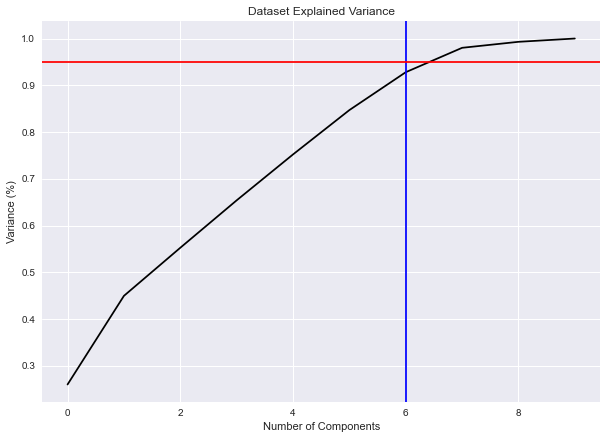

In [102]:
scaled_numeric = df[stand][:]
scaled_numeric_test = test_df[stand][:]

pca = PCA().fit(scaled_numeric)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance')
plt.axvline(6, c='b')
plt.axhline(0.95, c='r')
plt.show();

In [103]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled_numeric) 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']) #, 'principal component 7'

principalComponents_test = pca.transform(scaled_numeric_test)
principalDf_test = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']) #, 'principal component 7'

In [104]:
principalDf

principal component 1  principal component 2  principal component 3  \
0                   2.343112              -2.932957               0.776630   
1                  -2.025545               0.759021              -0.801698   
2                  -0.338394               1.458220               1.033812   
3                   0.107530               2.172973              -0.074409   
4                  -1.688751              -2.002526               0.746468   
...                      ...                    ...                    ...   
21926              -1.098616              -0.728374               0.422688   
21927              -1.887981              -3.134025              -0.361860   
21928               0.884331               0.431798               0.080658   
21929               0.550393              -2.063104               0.285796   
21930               0.813846              -0.328476              -0.127241   

       principal component 4  principal component 5  principal component 6  \
0                  -0.172602               0.196870              -0.708659   
1                  -0.357413              -1.735789              -0.082235   
2                  -0.990222               0.208640               0.047390   
3                  -0.707592              -0.263560              -0.945197   
4                   0.656582              -1.128322              -0.360506   
...                      ...                    ...                    ...   
21926              -0.302844              -0.285166              -0.744335   
21927               0.372278               0.830165               0.360629   
21928              -0.450561              -0.481698              -0.593751   
21929              -0.395759               1.339649              -0.852289   
21930               0.202053              -1.178536              -0.687389   

       principal component 7  
0                  -0.334356  
1                  -0.686419  
2                   0.462279  
3                  -0.459457  
4                   0.627049  
...                      ...  
21926              -1.043957  
21927               1.971159  
21928              -1.066620  
21929               0.830960  
21930               1.020268  

[21931 rows x 7 columns]

In [105]:
df2 = pd.concat([principalDf, df[df.columns.difference(stand)]], axis = 1)
df2_test = pd.concat([principalDf_test, test_df[test_df.columns.difference(stand)]], axis = 1)
# df2.drop(columns=stand, inplace=True)
# df2.drop(columns=['index', '7'], inplace=True)
df2

principal component 1  principal component 2  principal component 3  \
0                   2.343112              -2.932957               0.776630   
1                  -2.025545               0.759021              -0.801698   
2                  -0.338394               1.458220               1.033812   
3                   0.107530               2.172973              -0.074409   
4                  -1.688751              -2.002526               0.746468   
...                      ...                    ...                    ...   
21926              -1.098616              -0.728374               0.422688   
21927              -1.887981              -3.134025              -0.361860   
21928               0.884331               0.431798               0.080658   
21929               0.550393              -2.063104               0.285796   
21930               0.813846              -0.328476              -0.127241   

       principal component 4  principal component 5  principal component 6  \
0                  -0.172602               0.196870              -0.708659   
1                  -0.357413              -1.735789              -0.082235   
2                  -0.990222               0.208640               0.047390   
3                  -0.707592              -0.263560              -0.945197   
4                   0.656582              -1.128322              -0.360506   
...                      ...                    ...                    ...   
21926              -0.302844              -0.285166              -0.744335   
21927               0.372278               0.830165               0.360629   
21928              -0.450561              -0.481698              -0.593751   
21929              -0.395759               1.339649              -0.852289   
21930               0.202053              -1.178536              -0.687389   

       principal component 7  10   12  13_0.0  13_1.0  13_2.0  13_3.0  \
0                  -0.334356   0  0.0       0       0       1       0   
1                  -0.686419   0  0.0       0       0       0       1   
2                   0.462279   0  0.0       0       1       0       0   
3                  -0.459457   0  1.0       0       0       1       0   
4                   0.627049   0  0.0       0       0       0       1   
...                      ...  ..  ...     ...     ...     ...     ...   
21926              -1.043957   0  0.0       0       0       1       0   
21927               1.971159   1  0.0       1       0       0       0   
21928              -1.066620   0  0.0       0       0       0       1   
21929               0.830960   0  0.0       0       0       1       0   
21930               1.020268   0  0.0       0       0       1       0   

       13_Other  15  16_D  16_M  16_S  18_Other  18_a1  18_a10  18_a11  \
0             0   0     0     0     1         0      0       0       0   
1             0   0     0     1     0         0      0       0       0   
2             0   0     0     1     0         0      0       0       0   
3             0   0     1     0     0         0      0       0       0   
4             0   0     0     0     1         0      0       0       0   
...         ...  ..   ...   ...   ...       ...    ...     ...     ...   
21926         0   0     0     0     1         0      0       0       0   
21927         0   0     0     0     1         0      1       0       0   
21928         0   0     0     1     0         0      0       0       0   
21929         0   0     0     0     1         0      0       0       0   
21930         0   0     0     1     0         0      0       0       0   

       18_a12  18_a2  18_a3  18_a4  18_a5  18_a6  18_a7  18_a8  18_a9  1_a  \
0           0      0      0      0      0      0      0      1      0    1   
1           0      0      0      0      0      0      0      1      0    1   
2           0      0      0      1      0      0      0      0      0    1   
3           0      0      0      0      0      0      1

In [106]:
"""Testing some other feature selection methods"""

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2),
#               scoring='accuracy',
#               min_features_to_select=min_features_to_select)
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(min_features_to_select,
#                len(rfecv.grid_scores_) + min_features_to_select),
#          rfecv.grid_scores_)
# plt.show()

'Testing some other feature selection methods'

In [107]:
y = df2.label.values
X = df2.loc[:,df2.columns!='label'].values

test_X = df2_test.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

# Part 3 - Models

### Initial Models: KNN (test and self implementation) GNB and Logistic Regression
---

In [108]:
def plot_roc_curve(fpr, tpr):  
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', label='ROC') #The ROC curve of the train
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') #The random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(["AUC=%.3f"%auc(fpr, tpr)], loc = 'lower right')
    plt.show()

#### KNN
---

In [109]:
models_running_time = []

In [110]:
start = time.time()
KNN_options = {'n_neighbors' : [10, 50, 200], 
          'weights' : [ 'uniform', 'distance']
              }
# Setup classifier, and find using GridsearchCV the best hyper-parameters
kf = KFold(n_splits=5)
KNN_best = GridSearchCV(KNeighborsClassifier(),KNN_options, cv=kf, scoring='roc_auc', n_jobs=-1)
KNN_best.fit(X, y) #X_train, y_train

print ('KNN chosen parameters (recieved best AUC): {}'.format(KNN_best.best_params_))
print ("KNN AUC score with the chosen parameters: ", KNN_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time,2)))
models_running_time.append(total_time)

KNN chosen parameters (recieved best AUC): {'n_neighbors': 200, 'weights': 'distance'}
KNN AUC score with the chosen parameters:  0.8690589516398232
Running time: 0.36 minutes


In [111]:
neigh = KNeighborsClassifier(**KNN_best.best_params_)

### Self implementation of KNN:

In [112]:
class KNN:
    def __init__(self, K):
        self.K = K
        
    def fit(self, X, y):

        self.X = X 
        self.y = y 
        
    def predict(self, X_to_predict):

        x = self.X[:]
        y = self.y[:]
        stacked_dis = [np.vstack((y, np.linalg.norm(x-xi, axis=1))).T for xi in X_to_predict] #.reshape(y.shape[0], 1)
        closest = [stack[stack[:,-1].argsort()][:self.K] for stack in stacked_dis]
        return [np.unique(clo[:,0], return_counts=True)[0][np.argmax(np.unique(clo[:,0], return_counts=True)[1])] for clo in closest]
    
    def score(self, y_pred, y_test):
        return np.sum(y_pred == y_test)/len(y_test)

In [113]:
clf = KNN(K=100) #It is the class you just wrote down.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(y_pred, y_test)


0.8301800775017096

### Gaussian Naive Bayes

In [114]:
start = time.time()
GNB_options = {'priors' : [None], 
               'var_smoothing' : [ 1e-9, 1e-7, 1e-5, 1e-3, 0.1, 1, 10]
              }

# Setup classifier, and find using GridsearchCV the best hyper-parameters
skf = KFold(n_splits=5)
GNB_best = GridSearchCV(GaussianNB(), GNB_options, cv=skf, scoring='roc_auc', n_jobs=-1)
GNB_best.fit(X, y)

print ('GNB chosen parameters (recieved best AUC): {}'.format(GNB_best.best_params_))
print ("GNB AUC score with the chosen parameters: ", GNB_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time,2)))
models_running_time.append(total_time)

GNB chosen parameters (recieved best AUC): {'priors': None, 'var_smoothing': 1}
GNB AUC score with the chosen parameters:  0.8548017430866622
Running time: 0.01 minutes


In [115]:
GNB = GaussianNB(**GNB_best.best_params_)

#### Logistic Regression
---

In [116]:
start = time.time()
LogisticRegression_options = {'penalty' : ['l1', 'l2'],
                              'C' : [ 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                              'tol' : [ 0.001, 1e-5 ],
                              'max_iter' : [100, 2000],
                              'solver' : ["liblinear"]}

kf = KFold(n_splits = 5)
LR_best = GridSearchCV(LogisticRegression(), LogisticRegression_options, cv=kf, scoring = 'roc_auc', n_jobs = -1 )
LR_best.fit(X, y) #X_train, y_train

print ("Logistic Regresion best parameters: {}".format(LR_best.best_params_))
print ("Logistic Regresion AUC score with the chosen parameters: ", LR_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time,2)))
models_running_time.append(total_time)

Logistic Regresion best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Logistic Regresion AUC score with the chosen parameters:  0.8756671382437912
Running time: 1.12 minutes


In [117]:
LR = LogisticRegression(**LR_best.best_params_)

### Advanced Models: ANN and SVM

#### ANN
---

In [118]:
# import time
# start = time.time()
# ANN_options = {'activation' : ["relu"], #
#                'hidden_layer_sizes' : [(10,), # 1 small hidden layer
#                                        (20,), # another 1 small hidden layer
#                                        (100,),
#                                        (50, 50), # 2 medium size layers
#                                        (20, 20, 10, 10, 10)], #five small layers
# #                'alpha':[0],
#                'learning_rate_init' : [0.1, 0.01, 0.001], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
#                'random_state' :[100], # for consistent results
# #                'batch_size' :[100],
# #                'tol' : [1e-5],
#                'max_iter': [1000],
#                'solver': ['sgd', 'adam'],
#                'learning_rate': ['adaptive']
#               }

# # Setup classifier, and find using GridsearchCV the best parameters with kfold=5 as default
# kfold = KFold(n_splits = 10)
# ANN_best = GridSearchCV(MLPClassifier(), ANN_options, cv=kfold, scoring = 'roc_auc', n_jobs=-2)
# ANN_best.fit(X, y) #X_train, y_train
# print ('ANN chosen parameters (recieved best AUC): {}'.format(ANN_best.best_params_))
# print ("ANN AUC score with the chosen parameters: ", ANN_best.best_score_)


# total_time = (time.time()-start)/60
# print("Running time: %s minutes" % (total_time))
# models_running_time.append(total_time)

In [119]:
# ANN = MLPClassifier(**ANN_best.best_params_)

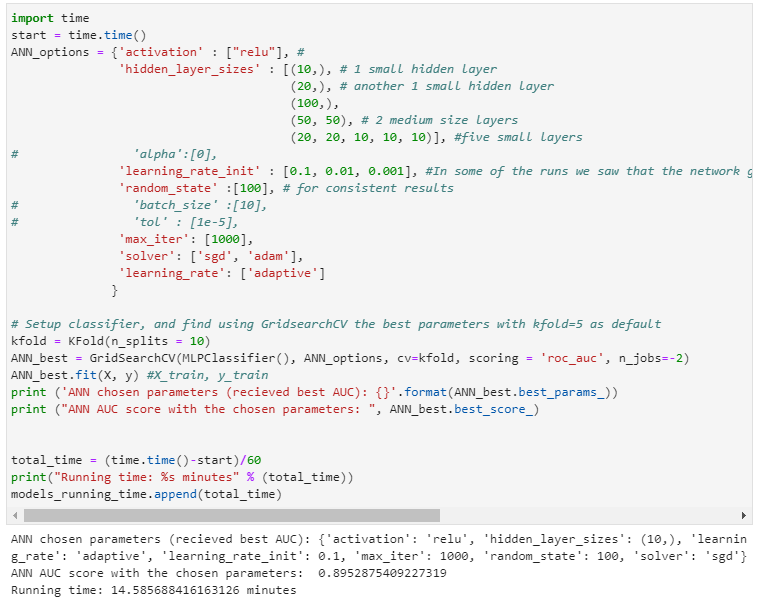

In [120]:
ANN = MLPClassifier(#-----The architecture:------#
                    activation="relu", hidden_layer_sizes= (10,), alpha = 0,                    
                    solver = "sgd", learning_rate_init = 0.1,
                    learning_rate = "adaptive", tol = 1e-5,
                    batch_size = 100, max_iter = 1000, random_state = 100
)

# ANN.fit(X_train, y_train)
# ANN.score(X_test, y_test)

In [121]:
# args = {'c': 'red', 'linestyle': '-'}
# plt.plot(ann_clf.loss_curve_, label='test', **args)

### SVC
---

In [122]:
# start = time.time()
# parametersOptions = {'C':[1.,0.1],
#                      'kernel': ['poly','rbf'],
#                      'tol' : [1e-3, 1e-5],
#                      'degree' : [3, 5],
#                      'probability': [True]
#                     }

# # Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
# kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
# SVC_best = GridSearchCV(SVC(), parametersOptions, cv = kfold, scoring='roc_auc',n_jobs = -1)
# SVC_best.fit(X, y) #X_train, y_train
# print ('SVC chosen parameters (recieved best AUC): {}'.format(SVC_best.best_params_))
# print ("SVC AUC score with the chosen parameters: ", SVC_best.best_score_)

# total_time = (time.time()-start)/60
# print("Running time: %s minutes" % (total_time))
# models_running_time.append(total_time)

In [123]:
# svc = SVC(**SVC_best.best_params_)

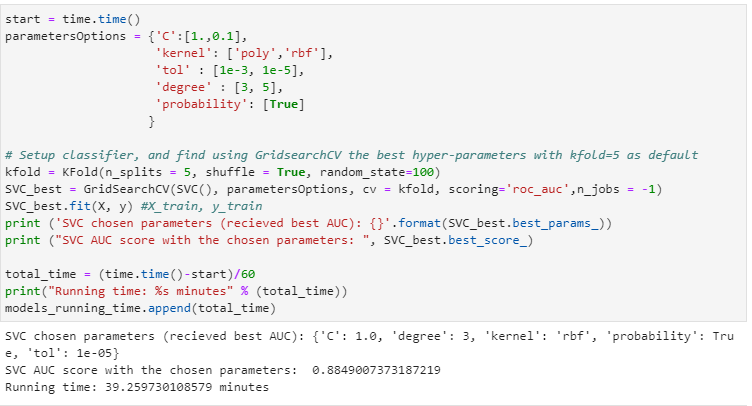

In [124]:
svc = SVC(C=1.0, degree=3, kernel='rbf', probability=True, tol=1e-5)

# Part 4: Models Evaluation

#### K-Fold CV

In [125]:
def KfoldProcess(X, y, clf, k):
    """
    This function trains the model using the k-folds
    X - X_train, the data to train the model
    y - Y_train, the target data
    clf - The classifier to train
    k - Number of folds to process
    """
    
    # Set KFolds with a random state for consistent results
    kf = KFold(n_splits = k, shuffle = True, random_state=100)
    
    # we catch the tpr and fpr since we need to interpolate data
    # Validation set:
    tpr_test, fpr_test, auc_test = [],[],[]
    # Train set:
    tpr_train, fpr_train, auc_train = [],[],[]
    
    # mean accuracy and tpr (of test)
    accuracy_test = []
    mean_tpr,mean_fpr = 0.0, np.linspace(0,1,100)
    
    # for confusion matrix plot
    fig, ax = plt.subplots(1,5,figsize=(25,5))
    cm = 0 # counter for ax instance
    
    # for confusion matrix values capture
    confusion_matrix_values = {'tp': 0, 'fp': 0, 'fn': 0, 'tn': 0}
    
    for train_index,test_index in kf.split(X):
        #Splitting into train and validation, based on the current fold.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Training the model using current fold
        clf.fit(X_train,y_train)
        
        # Predict current trained model using the validation set
        prob_prediction = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, prob_prediction) #getting fpr, tpr and threshold
                
        # Catch accuracy, tpr, fpr, auc
        prediction = clf.predict(X_test)
        accuracy_test.append(accuracy_score(prediction,y_test))
        
        # We interpolate the mean_tpr so all of the classifiers will be working under the same thersholds.
        tpr_interp = np.interp(np.linspace(0,1,100), fpr, tpr)
        fpr_interp = np.linspace(0,1,100)
        tpr_test.append(tpr)
        fpr_test.append(fpr)
        auc_test.append(auc(fpr_interp,tpr_interp))
        
        mean_tpr += np.interp(mean_fpr,fpr,tpr)
        mean_tpr[0] = 0.0
        
        # Check for overfitting using the train set:
        # Predict current trained model using the train set
        prob_prediction = clf.predict_proba(X_train)[:,1]
        fpr, tpr, thresholds = roc_curve(y_train, prob_prediction) #getting fpr, tpr and threshold
        
        tpr_interp = np.interp(np.linspace(0,1,100), fpr, tpr)
        fpr_interp = np.linspace(0,1,100)
        auc_train.append(auc(fpr_interp,tpr_interp))
        
        tpr_train.append(tpr)
        fpr_train.append(fpr)
        
        
        # plot confusion matrix for current fold
        plot_confusion_matrix(clf, X_test, y_test, values_format="d", ax=ax[cm], cmap=plt.cm.Blues) # confusion matrix for current fold's test set
        ax[cm].set_title("Confusion Matrix for fold #%s"%(cm+1))
        ax[cm].invert_xaxis()
        ax[cm].invert_yaxis()
        cm+=1
        
        
        # catch tn, fp, fn, tp from the confusion matrix
        tn, fp, fn, tp =  confusion_matrix(prediction,y_test).ravel()
        confusion_matrix_values['tp'] += tp
        confusion_matrix_values['fp'] += fp
        confusion_matrix_values['fn'] += fn
        confusion_matrix_values['tn'] += tn
    
    mean_tpr = mean_tpr/k # mean of all tpr
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr,mean_tpr) # Area Under the Curve of the ROC
    accuracy_mean = np.mean(accuracy_test, axis=0)
    plt.show()
    return [tpr_test, fpr_test, mean_tpr, mean_auc, auc_test, 
            tpr_train, fpr_train, auc_train, accuracy_mean, 
            accuracy_test, confusion_matrix_values]

In [126]:
def kFoldPlot(tpr_test, fpr_test, mean_tpr, mean_auc, auc_test,
              tpr_train, fpr_train, auc_train, accuracy_mean, accuracy_test, confusion_matrix_values):
    fig, ax = plt.subplots(2,2,figsize=(18,14))
    
    # Graph #1: Plot ROC and mean AUC of all folds
    ax[0,0].plot([0,1],[0,1],color = "green", linestyle = '--')
    ax[0,0].set_title("ROC and mean AUC of all folds")
    ax[0,0].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_test)):
        ax[0,0].plot(fpr_test[i], tpr_test[i], color = 'grey')
    ax[0,0].plot([0],[0],color='grey', label='K-Folds')
    ax[0,0].plot(np.linspace(0,1,100), mean_tpr, color="red", linestyle='-', label='Mean ROC (area = %0.4f)' % mean_auc)
    ax[0,0].legend(loc="lower right")
    
    # Graph #2: Plot ROC and AUC for every fold - Validation set
    ax[0,1].plot([0,1],[0,1],color = "green", linestyle = '--')
    ax[0,1].set_title("ROC and AUC for every fold - Validation set")
    ax[0,1].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_test)):
        ax[0,1].plot(fpr_test[i], tpr_test[i], label = 'Fold %s (area = %0.4f)' % (str(i+1),auc_test[i]))   
    ax[0,1].legend(loc="lower right")
    
    # Graph #3: Plot ROC and AUC for every fold - Train set
    ax[1,0].plot([0,1],[0,1],color = "green", linestyle = '--')
    ax[1,0].set_title("OVERFITTING CHECK: ROC and AUC for every fold - Train set")
    ax[1,0].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_train)):
        ax[1,0].plot(fpr_train[i], tpr_train[i], label = 'Fold %s (area = %0.4f)' % (str(i+1),auc_train[i]))
    ax[1,0].legend(loc="lower right")
    
    # Graph #4: Accuracy vs K-Folds
    ax[1,1].plot(range(1,len(accuracy_test)+1),accuracy_test)
    ax[1,1].set_ylim([0.8,1])
    ax[1,1].axhline(0.85,c='g')
    ax[1,1].set_title("Accuracy vs. K-Folds")
    ax[1,1].set(xlabel='K-Folds',ylabel='Accuracy')
    
    plt.show()
    print("Mean Accuracy: %0.8f" %(accuracy_mean))
    
    # the extra accuracy measurement
    extra_accuracy = (confusion_matrix_values['tp']+confusion_matrix_values['tn'])/\
          (confusion_matrix_values['tp']+confusion_matrix_values['tn']+confusion_matrix_values['fp']+5*confusion_matrix_values['fn'])
    
    ########### The 2nd accuracy measure
    print("2nd Accuracy Measure: %0.8f"\
          %(extra_accuracy))

    print("Mean AUC on test: %0.8f\nMean AUC on train: %0.8f" % (mean_auc,np.mean(auc_train)))
    
    overfitting = ""
    if np.mean(auc_train) - mean_auc > 0.1: # overfitting where the difference between the test AUC and the train AUC is at least 0.1
        overfitting = "Overfitting"
    else:
        overfitting = "No Overfitting"
    print(overfitting)
    return [mean_tpr,mean_auc]

In [127]:
auc_graph = {}

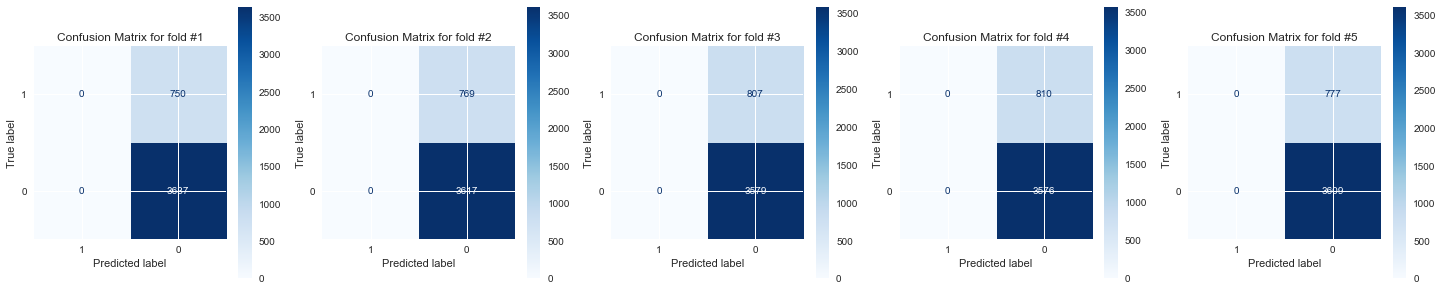

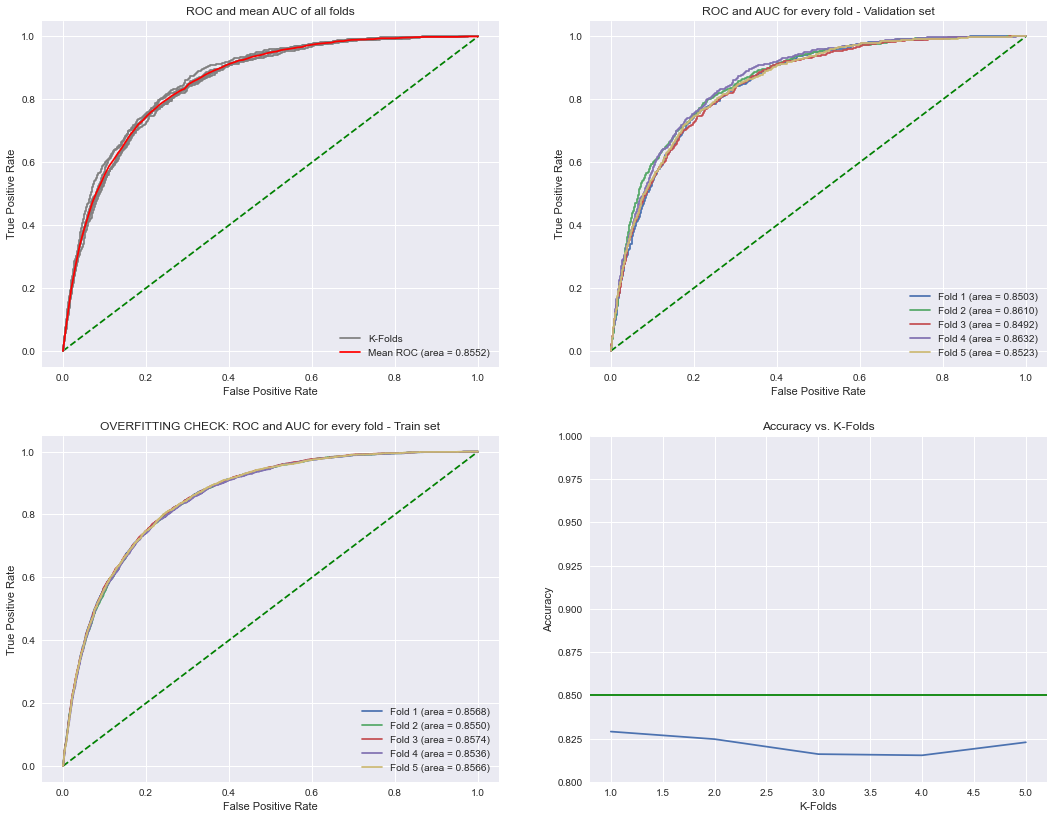

Mean Accuracy: 0.82157642
2nd Accuracy Measure: 0.82157676
Mean AUC on test: 0.85518639
Mean AUC on train: 0.85585755
No Overfitting


In [128]:
parameters = KfoldProcess(X, y, GNB, 5) #X_train, y_train
auc_graph["Gaussian Naive Bayes"] = kFoldPlot(*parameters)

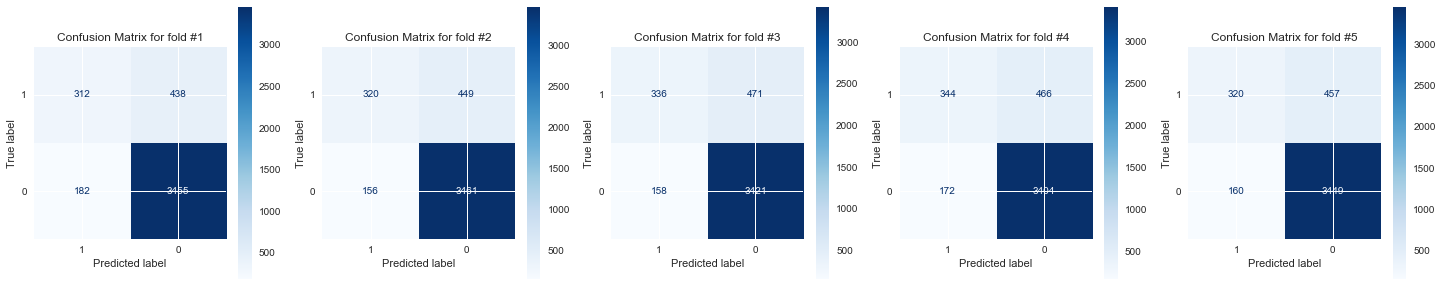

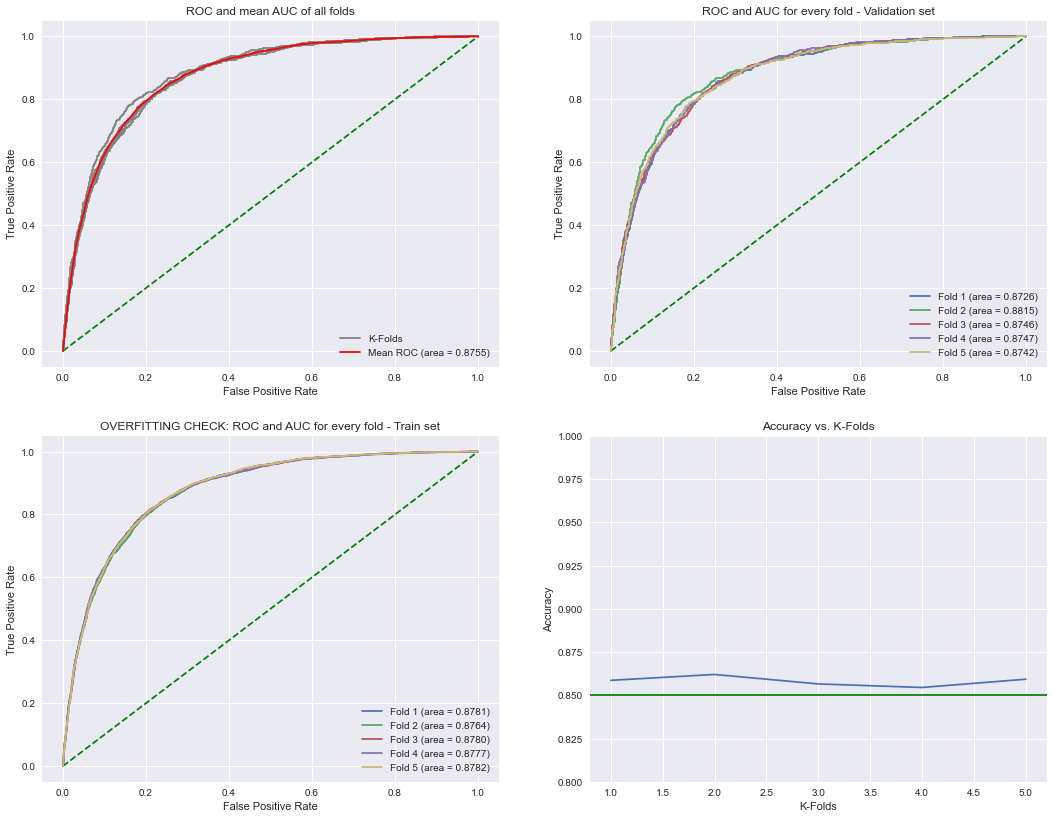

Mean Accuracy: 0.85823718
2nd Accuracy Measure: 0.74563245
Mean AUC on test: 0.87548064
Mean AUC on train: 0.87770293
No Overfitting


In [129]:
parameters = KfoldProcess(X, y, LR, 5) #X_train, y_train
auc_graph["Logistic Regression"] = kFoldPlot(*parameters)

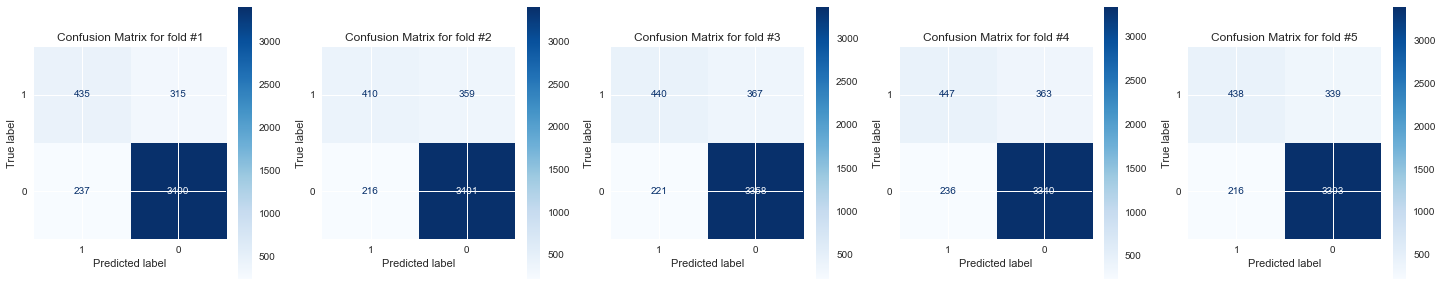

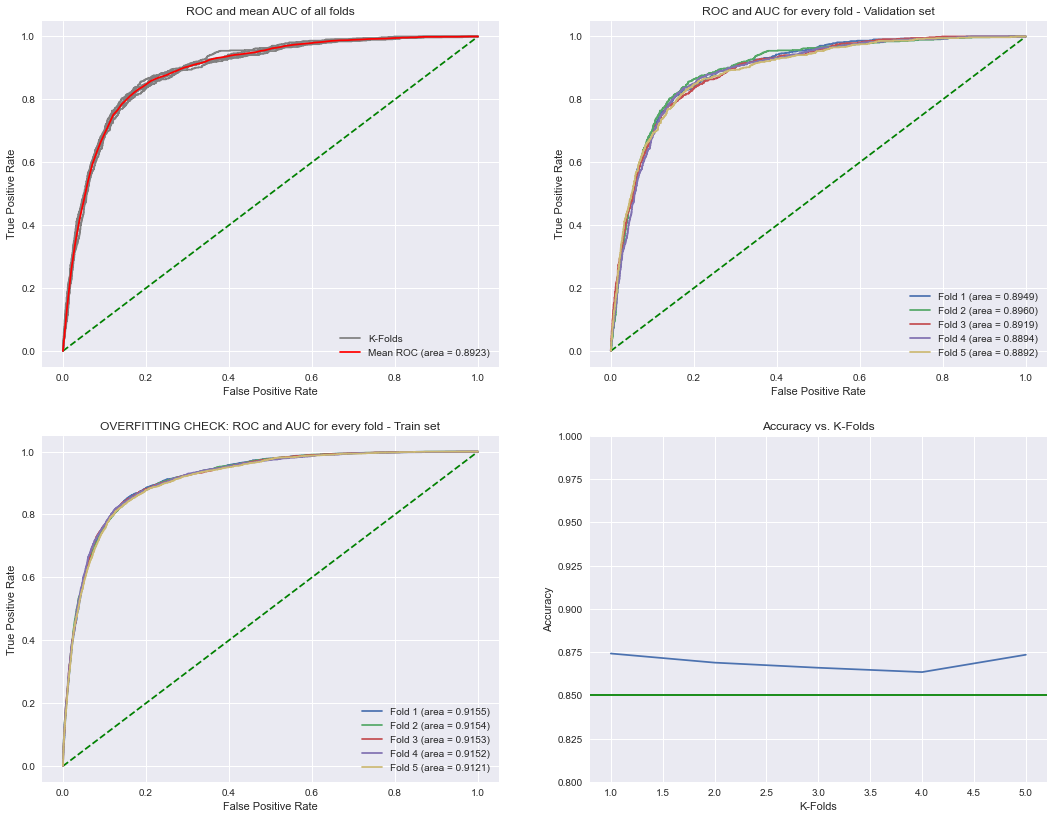

Mean Accuracy: 0.86918038
2nd Accuracy Measure: 0.72108946
Mean AUC on test: 0.89225438
Mean AUC on train: 0.91471982
No Overfitting


In [130]:
parameters = KfoldProcess(X, y, ANN, 5) #X_train, y_train
auc_graph["Artificial Neural Networks"] = kFoldPlot(*parameters)

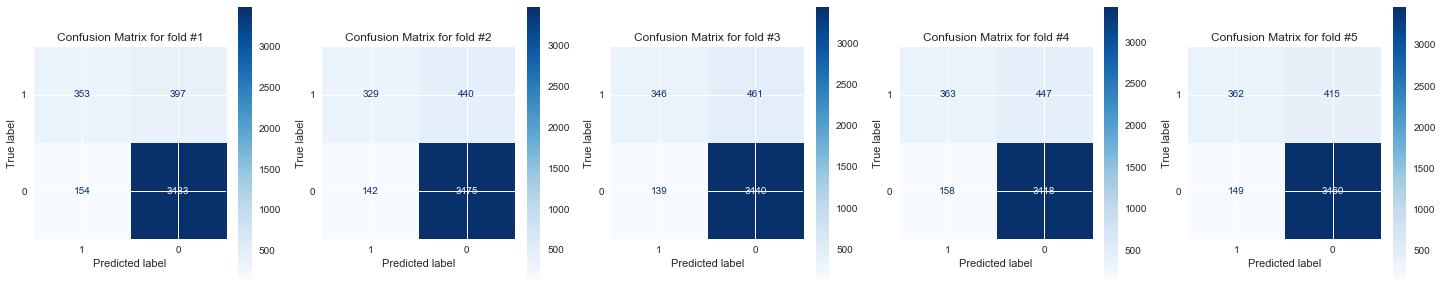

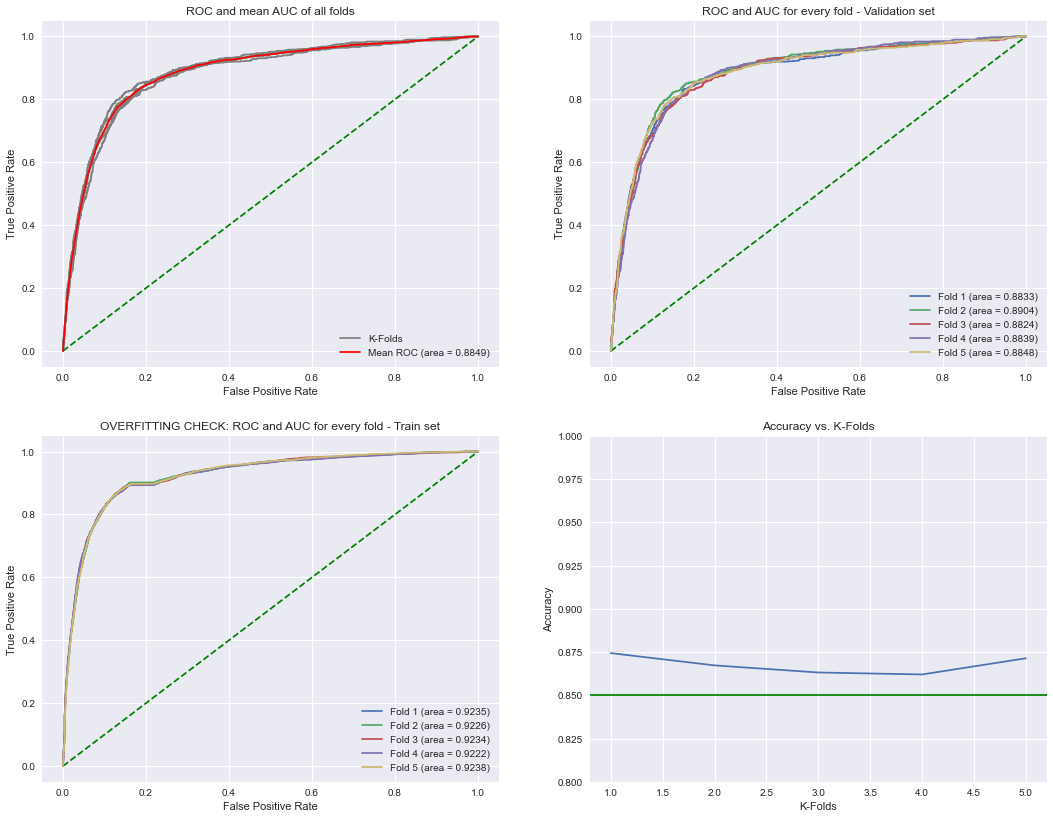

Mean Accuracy: 0.86767559
2nd Accuracy Measure: 0.76424756
Mean AUC on test: 0.88491618
Mean AUC on train: 0.92309347
No Overfitting


In [131]:
parameters = KfoldProcess(X, y, svc, 5) #X_train, y_train
auc_graph["SVC"] = kFoldPlot(*parameters)

In [132]:
# from scipy.stats import sem
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import RepeatedKFold
# from sklearn.model_selection import cross_val_score
 
# # evaluate a model with a given number of repeats
# def evaluate_model(X, y, repeats):
#     # prepare the cross-validation procedure
#     cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
#     # create model
#     model = MLPClassifier()
#     # evaluate model
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#     return scores
 

# repeats = range(1,5)
# results = list()
# for r in repeats:
#     # evaluate using a given number of repeats
#     scores = evaluate_model(X, y, r)
#     # summarize
#     print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
#     # store
#     results.append(scores)
# # plot the results
# plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
# plt.show()

# Part 5 - Prediction of test data

In [133]:
ANN.fit(X,y)
predictions = ANN.predict_proba(test_X)[:,1]
df_pred = pd.DataFrame(predictions)
df_pred.rename(columns = {0 : 'pred_proba'}, inplace = True)

In [134]:
df_pred.head()

pred_proba
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0

In [135]:
df_pred.to_csv('Submission_group_3.csv')

In [136]:
total_time = (time.time()-starting)/60
print("Total Notebook running time: %s minutes" % (round(total_time,2)))

Total Notebook running time: 12.93 minutes
